# Segmentez des clients d'un site e-commerce 


Etude data - Projet 5 - Nalron (Décembre 2020) OpenClassrooms / CentraleSupélec

Traitement des données sur Jupyter Notebook (Distribution Anaconda)

Etude réalisée en langage Python

*Data source* : [Base de données anonymisée](https://www.kaggle.com/olistbr/brazilian-ecommerce)

---

## Essais de différentes approches de modélisation
Méthodes non supervisées pour regrouper ensemble des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe marketing pour mieux communiquer.

In [1]:
import pandas as pd
import seaborn as sns
import pickle
from zipfile import ZipFile
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from matplotlib.collections import LineCollection
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import cluster, metrics
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [3]:
pd.options.display.max_rows = 150
pd.options.display.max_columns = 150
plt.style.use('ggplot') 
plt.rcParams.update(
    {
     'figure.figsize': (15, 10),
     'axes.labelsize': 15,
     'axes.titlesize':25,
     'xtick.labelsize':15,
     'ytick.labelsize':15,
     'axes.titleweight':'bold',
     'axes.titleweight':'bold'
    })

In [4]:
olistbr = pd.read_csv('p5_00_dataset/olistbr.csv', delimiter=';').set_index('customer_unique_id')
olistbr

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2          129.90       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90        27.19   
0000f46a3911fa3c0805444483337064           69.00        86.22   
0000f6ccb0745a6a4b88665a16c9f078           25.99        43.62   
0004aac84e0df4da2b147fca70cf8255          180.00       196.89   
...                                          ...          ...   
fffcf5a5ff07b0908bd4e2dbc735a684          785.00      1148.28   
fffea47cd6d3cc0a88bd621562a9d061           64.89        84.58   
ffff371b4d645b6ecea244b27531430a           89.90       112.46   
ffff5962728ec6157033ef9805bacc48          115.00       133.69   
ffffd2657e2aad2907e67c3e9daecbeb           56.99        71.56   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2            129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90             18.90   
0000f46a3911fa3c0805444483337064             69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00            180.00   
...                                            ...               ...   
fffcf5a5ff07b0908bd4e2dbc735a684            890.00            890.00   
fffea47cd6d3cc0a88bd621562a9d061             64.89             64.89   
ffff371b4d645b6ecea244b27531430a             89.90             89.90   
ffff5962728ec6157033ef9805bacc48            115.00            115.00   
ffffd2657e2aad2907e67c3e9daecbeb             56.99             56.99   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fffcf5a5ff07b0908bd4e2dbc735a684                           1.0   
fffea47cd6d3cc0a88bd621562a9d061                           1.0   
ffff371b4d645b6ecea244b27531430a                           1.0   
ffff5962728ec6157033ef9805bacc48                           1.0   
ffffd2657e2aad2907e67c3e9daecbeb                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                        0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1   
0000f46a3911fa3c0805444483337064                        0   
0000f6ccb0745a6a4b88665a16c9f078                        1   
0004aac84e0df4da2b147fca70cf8255                        0   
...                                                   ...   
fffcf5a5ff07b0908bd4e2dbc735a684                        0   
fffea47cd6d3cc0a88bd621562a9d061                        0   
ffff371b4d645b6ecea244b27531430a                        0   
ffff5962728ec6157033ef9805bacc48                        0   
ffffd2657e2aad2907e67c3e9daecbeb                        0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                      0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      0   
0000f46a3911fa3c0805444483337064                      1   
0000f6ccb0745a6a4b88665a16c9f078                      0   
0004aac84e0df4da2b147fca70cf8255                      0   
...                                                 ...   
fffcf5a5ff07b0908bd4e2dbc735a684                      0   
fffea47cd6d3cc0a88bd621562a9d061                      1   
ffff371b

In [5]:
olistbr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93605 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 33 columns):
average_basket                  93605 non-null float64
total_spent                     93605 non-null float64
max_order_amount                93605 non-null float64
min_order_amount                93605 non-null float64
number_of_products_purchased    93605 non-null float64
bucket_quartile_lower25         93605 non-null int64
bucket_quartile_25_50           93605 non-null int64
bucket_quartile_50_75           93605 non-null int64
bucket_quartile_upper75         93605 non-null int64
payment_boleto                  93605 non-null float64
payment_credit_card             93605 non-null float64
payment_debit_card              93605 non-null float64
payment_voucher                 93605 non-null float64
appliances                      93605 non-null float64
auto                            93605 non-null float64
construction         

In [6]:
olistbr.describe()

average_basket   total_spent  max_order_amount  min_order_amount  \
count    93605.000000  93605.000000      93605.000000      93605.000000   
mean       126.335502    146.718385        126.442726        126.442726   
std        190.492372    198.467519        191.173504        191.173504   
min          0.850000      6.080000          0.850000          0.850000   
25%         42.950000     57.600000         42.000000         42.000000   
50%         79.000000     96.320000         79.000000         79.000000   
75%        139.900000    163.580000        139.900000        139.900000   
max       6735.000000   6929.310000       6735.000000       6735.000000   

       number_of_products_purchased  bucket_quartile_lower25  \
count                       93605.0             93605.000000   
mean                            1.0                 0.249239   
std                             0.0                 0.432575   
min                             1.0                 0.000000   
25%                             1.0                 0.000000   
50%                             1.0                 0.000000   
75%                             1.0                 0.000000   
max                             1.0                 1.000000   

       bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
count           93605.000000           93605.000000             93605.000000   
mean                0.251076               0.248993                 0.250638   
std                 0.433635               0.432432                 0.433383   
min                 0.000000               0.000000                 0.000000   
25%                 0.000000               0.000000                 0.000000   
50%                 0.000000               0.000000                 0.000000   
75%                 1.000000               0.000000                 1.000000   
max                 1.000000               1.000000                 1.000000   

       payment_boleto  payment_credit_card  payment_debit_card  \
count    93605.000000         93605.000000        93605.000000   
mean         0.199263             0.773025            0.015448   
std          0.399448             0.425885            0.123413   
min          0.000000             0.000000            0.000000   
25%          0.000000             1.000000            0.000000   
50%          0.000000             1.000000            0.000000   
75%          0.000000             1.000000            0.000000   
max          1.000000             2.000000            2.000000   

       payment_voucher    appliances          auto  construction  \
count     93605.000000  93605.000000  93605.000000  93605.000000   
mean          0.056087      8.113874      5.714106      3.620372   
std           0.410192     65.948217     51.705677     42.154614   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      0.000000   
50%           0.000000      0.000000      0.000000      0.000000   
75%           0.000000      0.000000      0.000000      0.000000   
max          29.000000   6735.000000   2258.000000   3099.900000   

            culture   electronics       fashion          food        garden  \
count  93605.000000  93605.000000  93605.000000  93605.000000  93605.000000   
mean       1.134748     17.331229     14.014532      0.579879      4.466273   
std       25.940659     95.130647     81.488114      8.182706     48.282946   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max     6499.000000   6729.000000   3999.900000    699.900000   3930.000000   

       health_beauty       hobbies          home        office        others  \
count   93605.000000  93605.00000

# Modélisations

### Normalisation et encodage des données
L'échantillon est composé de plusieurs variables avec des différences d'échelle. Il est donc nécessaire de traiter ces écarts pour ne pas biaiser les modélisations. 

In [7]:
X = olistbr.copy()

categorical_columns = X.select_dtypes('object').columns
numerical_columns = X.drop(columns=categorical_columns).columns

scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X[categorical_columns])
X = pd.merge(X[numerical_columns], 
             pd.DataFrame(data = X_categorical, 
                          columns = encoder.get_feature_names(['state'])).set_index(X.index),
                          left_index = True, right_index = True, how='left')
X.drop_duplicates(inplace=True)

X.name = "X"
X.shape

(93031, 38)

### Échantillon d'essai
Afin d'optimiser les temps de calcul des différentes pistes de modélisation, un échantillon de 10000 individus sera pris comme population test. La méthode .sample() permet une sélection au hasard des individus…


In [8]:
X_sample = X.copy()
X_sample = X_sample.sample(n=10000)
X_sample.name = "X_sample"
X_sample.shape

(10000, 38)

In [9]:
display(X_sample.duplicated().sum().sum())
display(X_sample.isna().sum().sum())

0

0

### Décomposition PCA
L'ACP (*Analyse en Composantes Principales*) permettra une visualisation plus simple des clusters sur le premier plan factoriel (ou plus).

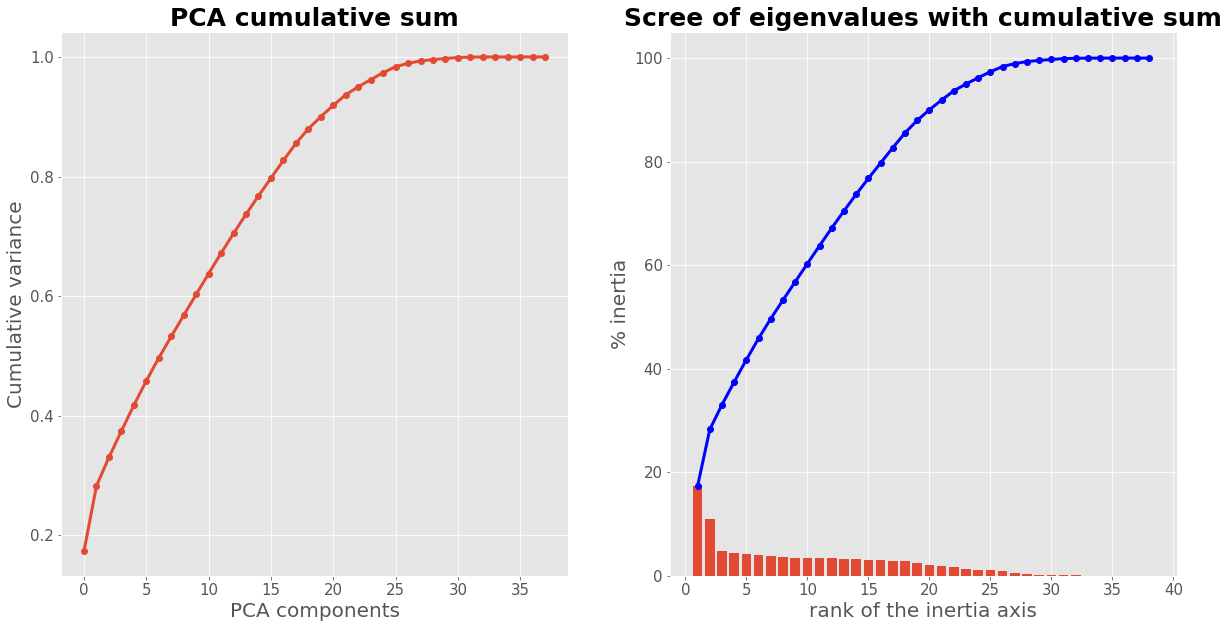

In [10]:
def pca_eigenvalues(X):
    '''PCA plot and scree of eigenvalues with cumulative sum.'''
    pca = PCA(svd_solver='full').fit(X)

    plt.figure(figsize=(20,10))
    plt.subplot(121)
    plt.plot(list(range(X.shape[1])), pca.explained_variance_ratio_.cumsum(),marker='o', linewidth=3)
    plt.xlabel('PCA components', fontsize=20)
    plt.ylabel('Cumulative variance', fontsize=20)
    plt.title('PCA cumulative sum', fontsize=25)

    plt.subplot(122)
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="blue",marker='o', linewidth=3)  
    plt.xlabel('rank of the inertia axis', fontsize=20)
    plt.ylabel('% inertia', fontsize=20)
    plt.title("Scree of eigenvalues with cumulative sum", fontsize=25)
    plt.show()
    
pca_eigenvalues(X_sample)

In [11]:
pca = PCA(n_components=20).fit(X_sample)
pca.explained_variance_ratio_.cumsum()

array([0.1737934 , 0.28273817, 0.33049648, 0.37462772, 0.41758866,
       0.45863337, 0.49678029, 0.53260546, 0.56793975, 0.60297804,
       0.63781827, 0.67191007, 0.7049988 , 0.73693939, 0.76770482,
       0.79737187, 0.82688016, 0.85544227, 0.87977837, 0.90012329])

Le premier plan factoriel permet d'expliquer près de 28% de la variance. On peut expliquer 90% de la variance en prenant en compte 20 composantes. Notons que si n_components > 27, la variance ne progresse plus, les 100% sont atteint.

In [12]:
def eigenvalues_variance(X):
    '''eigenvalues, explained variances and cumulative explained variance.'''
    
    pca = PCA(svd_solver='full').fit(X)
    
    eig = pd.DataFrame(
        {
            "axe" : ["F" + str(x + 1) for x in range(shape(X)[1])], 
            "eigenvalues" : pca.explained_variance_,
            "%explained_variance" : np.round(pca.explained_variance_ratio_ * 100),
            "%cumulative_explained_variance" : np.round(np.cumsum(pca.explained_variance_ratio_) * 100)
        },
        columns = ["axe", "eigenvalues", "%explained_variance", "%cumulative_explained_variance"])
    return eig

eigenvalues_variance(X_sample)

axe   eigenvalues  %explained_variance  %cumulative_explained_variance
0    F1  5.315224e+00                 17.0                            17.0
1    F2  3.331921e+00                 11.0                            28.0
2    F3  1.460620e+00                  5.0                            33.0
3    F4  1.349691e+00                  4.0                            37.0
4    F5  1.313899e+00                  4.0                            42.0
5    F6  1.255294e+00                  4.0                            46.0
6    F7  1.166669e+00                  4.0                            50.0
7    F8  1.095662e+00                  4.0                            53.0
8    F9  1.080649e+00                  4.0                            57.0
9   F10  1.071596e+00                  4.0                            60.0
10  F11  1.065539e+00                  3.0                            64.0
11  F12  1.042650e+00                  3.0                            67.0
12  F13  1.011972e+00                  3.0                            70.0
13  F14  9.768576e-01                  3.0                            74.0
14  F15  9.409170e-01                  3.0                            77.0
15  F16  9.073246e-01                  3.0                            80.0
16  F17  9.024691e-01                  3.0                            83.0
17  F18  8.735315e-01                  3.0                            86.0
18  F19  7.442848e-01                  2.0                            88.0
19  F20  6.222206e-01                  2.0                            90.0
20  F21  5.783377e-01                  2.0                            92.0
21  F22  5.405596e-01                  2.0                            94.0
22  F23  4.056343e-01                  1.0                            95.0
23  F24  3.689862e-01                  1.0                            96.0
24  F25  3.539439e-01                  1.0                            97.0
25  F26  3.077168e-01                  1.0                            98.0
26  F27  1.737012e-01                  1.0                            99.0
27  F28  1.211184e-01                  0.0                            99.0
28  F29  6.673114e-02                  0.0                           100.0
29  F30  5.581809e-02                  0.0                           100.0
30  F31  5.170104e-02                  0.0                           100.0
31  F32  1.843909e-02                  0.0                           100.0
32  F33  9.185468e-03                  0.0                           100.0
33  F34  2.310861e-03                  0.0                           100.0
34  F35  2.182065e-04                  0.0                           100.0
35  F36  1.053056e-04                  0.0                           100.0
36  F37  7.991826e-05                  0.0                           100.0
37  F38  4.086457e-32                  0.0                           100.0

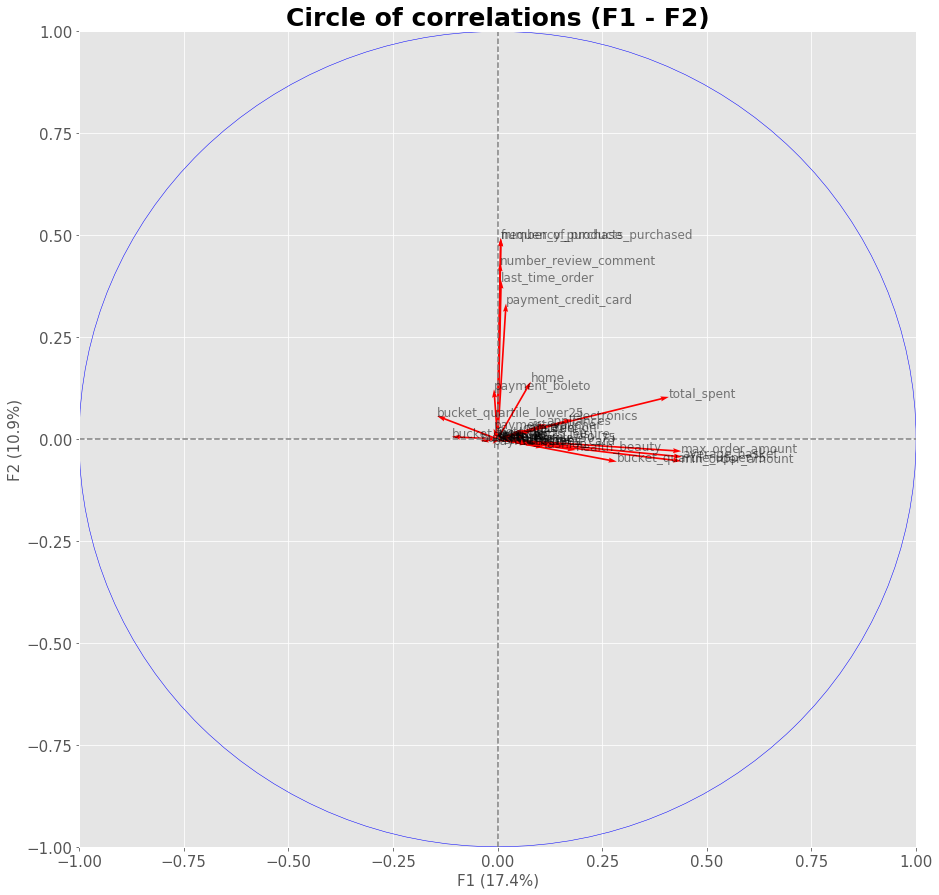

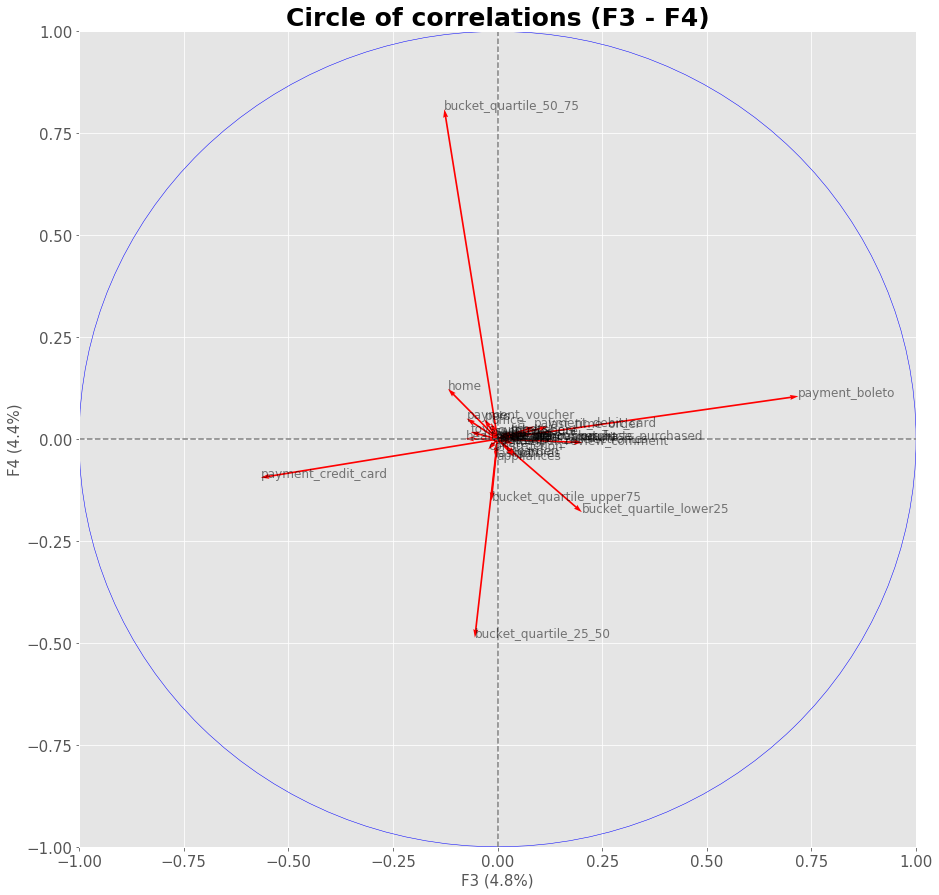

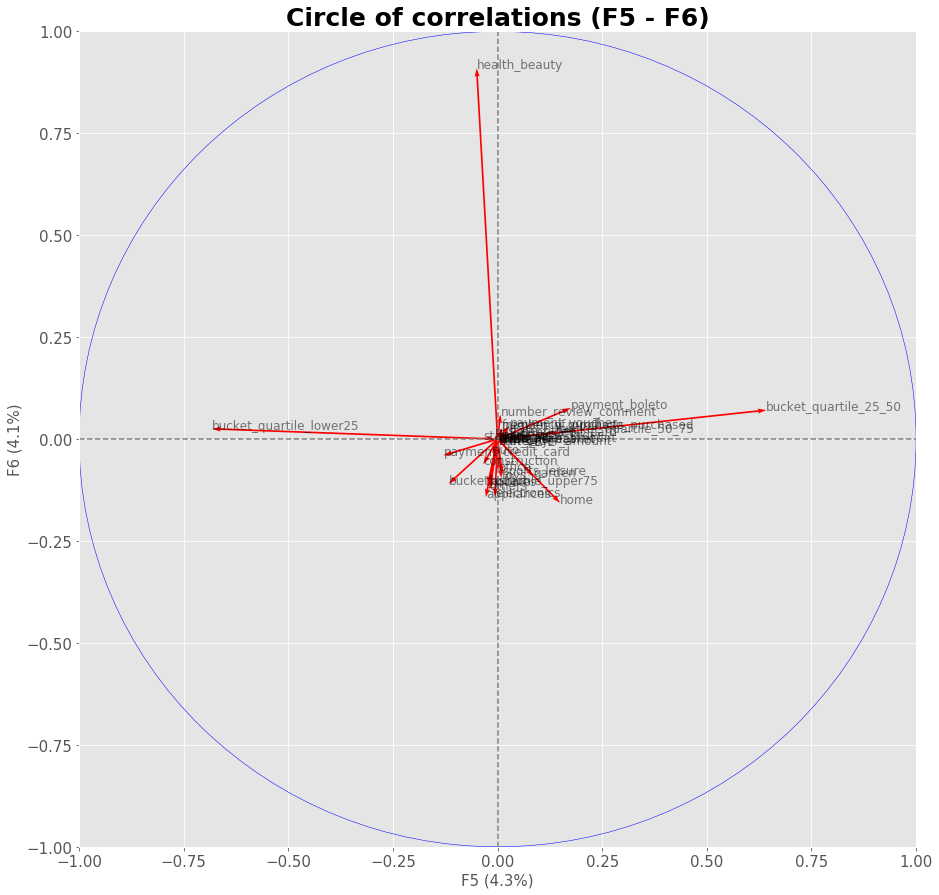

In [13]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    '''Circles of correlations with several factorial plans.'''

    for d1, d2 in axis_ranks: 
        if d2 < n_comp:

            fig, ax = plt.subplots(figsize=(15,15))

            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 45 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            if pcs.shape[1] < 45 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="r", width=0.002)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='12', rotation=label_rotation, color="black", alpha=0.5)
            
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)

        
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Circle of correlations (F{} - F{})".format(d1+1, d2+1))
        plt.show(block=False)

display_circles(pcs=pca.components_, n_comp=6, pca=pca, axis_ranks=[(0,1),(2,3),(4,5)], 
                labels=X_sample.columns, label_rotation=0, lims=None)

Ici l'utilité d'une projection sur les premiers plans factoriels n'est pas source d'information. Un grand nombre de features sont plus ou moins représentés selon les composantes. Par exemple, sur F6 les clients dont l'intérêt est particulièrement porté sur des produits de beauté du corps sont très bien représentés. Seulement cet axe n'explique que 4% de la variance, on pourrait l'assimiler à une niche de clients.

Mais ici dans le contexte métier, le grand nombre de features ne rend pas l'expression faite par les cercles des corrélations explicite, l'utilité de l'ACP reste néanmoins essentielle pour la phase de réduction dimensionnelle.

**Les essais des différentes approches de modélisation seront exploités sur les algorithmes du Kmeans, AgglomerativeClustering et DBSCAN.**

# Modélisation Kmeans
Il est impératif de déterminer le k optimal, le but étant de pouvoir identifier le nombre de clusters le plus adapté aux données de l'échantillon.

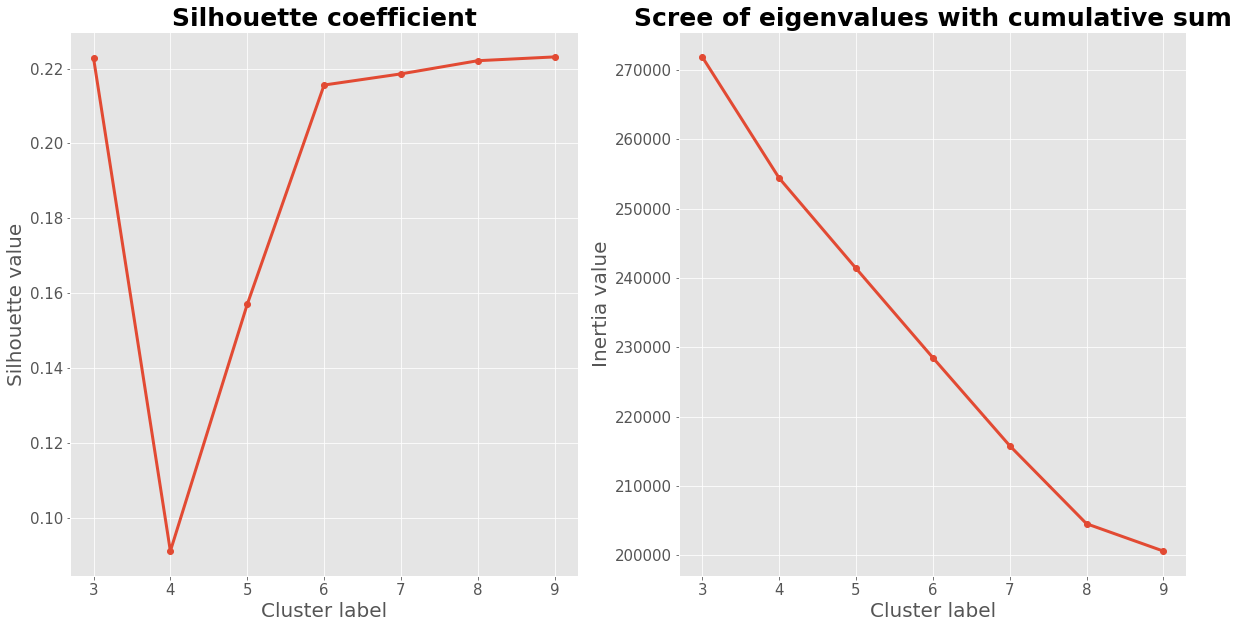

Time: 22.673 seconds


In [14]:
def silhouette_inertia(X):
    '''Silhouette coefficient and Inertia values plots. Manage clusters labels…'''
    
    start_time = time.time()
    plt.figure(figsize=(20,10))
    silhouettes = [] 
    inerties=[]

    plt.subplot(121)
    for k in range(3,10): 
        km = KMeans(n_clusters=k)  
        km.fit(X)
        silh = metrics.silhouette_score(X, km.labels_)
        silhouettes.append(silh) 
    plt.plot(range(3,10), silhouettes, marker='o', linewidth=3)
    plt.xlabel('Cluster label', fontsize=20)
    plt.ylabel('Silhouette value', fontsize=20)
    plt.title("Silhouette coefficient", fontsize=25)

    plt.subplot(122)
    for k in range(3,10):
        km = KMeans(n_clusters=k)
        km.fit(X)
        inerties.append(km.inertia_)
    plt.plot(range(3,10), inerties, marker='o', linewidth=3)
    plt.xlabel('Cluster label', fontsize=20)
    plt.ylabel('Inertia value', fontsize=20)
    plt.title("Scree of eigenvalues with cumulative sum", fontsize=25)
    
    plt.show()
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    
silhouette_inertia(X_sample)

Le nombre de cluster optimal est estimé à k=3, la silhouette est supérieur à 0.22, mais un clustering en k=4 peut également être intéressant. L'interprétabilité business peut en effet s'avérer plus facile et plus détaillée en 4 clusters plutôt que 3, il est donc utile d'estimer les deux.

### Quelques fonctions utiles à l'analyse…

In [10]:
def kmeans_model(X, k, folder):
    '''Kmeans Model and save in folder.'''
    start_time = time.time()
    model_kms = KMeans(n_clusters=k)  
    model_kms.fit(X)
    
    filename = str(model_kms).split('(')[0]
    pickle.dump(model_kms, open(folder + filename + str(k) + '_' + str(X.name) + '.pkl', 'wb'))
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    
    return model_kms.fit(X)

In [11]:
def kmeans_clustering_pca(X, k, get_model, get_folder, add_title):
    '''Projection Kmeans Model on the first factorial plane with percentage distribution clusters.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    
    start_time = time.time()
    pca = PCA(svd_solver = 'full').fit(X)
    X_projected = pca.transform(X)

    plt.figure(figsize=(20, 10))
    sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                    hue = model_kms.labels_,
                    palette = 'Set1',
                    s=100, alpha=0.2).set_title('PCA - KMeans Clusters('+ str(k) +') ' + add_title, fontsize=30)
    
    ax, fig = plt.subplots(figsize=(20,6)) 
    clusters = pd.DataFrame(model_kms.labels_, columns=['cluster'])
    ax = sns.countplot(data=clusters, y='cluster', palette = 'Set1', alpha=.8, 
                       order=clusters['cluster'].value_counts(sort=False).index, orient='h')

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(clusters))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)

    ax.set_title('Kmeans Clusters('+ str(k) +') ' + add_title)
    
    
    print("KMeans Silhouette Score: {}".format(round(metrics.silhouette_score(X_projected, 
                                               model_kms.labels_, metric='euclidean'), 3)))
    print("Time pca plot: {} seconds".format(round(time.time() - start_time, 3)))
    
    show()

In [12]:
def kmeans_clustering_tsne(X, k, get_model, get_folder, add_title):
    '''Cluster visualization on T-sne.'''
    start_time = time.time()
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    plt.figure(figsize=(12,12))
    sns.scatterplot(T[:,0], T[:,1], hue = model_kms.labels_, palette = 'Set1')
    plt.title('TSNE - KMeans Clusters('+ str(k) +') ' + add_title, fontsize=20)
    show()
    
    print("Time TSNE plot: {} seconds".format(round(time.time() - start_time, 3)))

In [13]:
def centroids_cls(X, get_model, get_folder):
    '''Centroid approach according to feature / cluster.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))

    idk = np.argsort(model_kms.labels_)

    X_cls = pd.DataFrame(X.index[idk], model_kms.labels_[idk]).reset_index()
    X_cls = X_cls.rename(columns={'index':'cluster'})
    X_cls = pd.merge(X, X_cls, on='customer_unique_id').set_index('customer_unique_id')
    
    centroids = model_kms.cluster_centers_
    centroids = pd.DataFrame(centroids, columns=X.columns)
    
    return X_cls, centroids

In [14]:
def data_cls(X, get_model, get_folder):
    '''Integration of cluster identifiers.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))

    idk = np.argsort(model_kms.labels_)

    X_cls = pd.DataFrame(X.index[idk], model_kms.labels_[idk]).reset_index()
    X_cls = X_cls.rename(columns={'index':'cluster'})
    X_cls = pd.merge(X, X_cls, left_index=True, right_on='customer_unique_id').set_index('customer_unique_id')
    
    return X_cls

In [15]:
def features_kmeans(X, view_features, get_model, get_folder):
    '''Visualization of some features.'''
    model_kms = pickle.load(open(get_folder + '/' + get_model + '.pkl', 'rb'))
    X_centroids = centroids_cls(X, get_model, get_folder)[0]
    plt.figure(figsize=(20, 100))
    i=1
    for var in X.columns : 
        if var in view_features:
            plt.subplot(20,2,i)
            sns.boxplot(data=X_centroids, x='cluster', y=var, palette="Set1", saturation=.8)
            plt.title(var)
            plt.ylabel('')
            plt.tight_layout()
            i+=1
    show()

In [21]:
kmeans_model(X=X_sample, k=3, folder='p5_00_model/')

Time: 0.292 seconds


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans Silhouette Score: 0.227
Time pca plot: 2.492 seconds


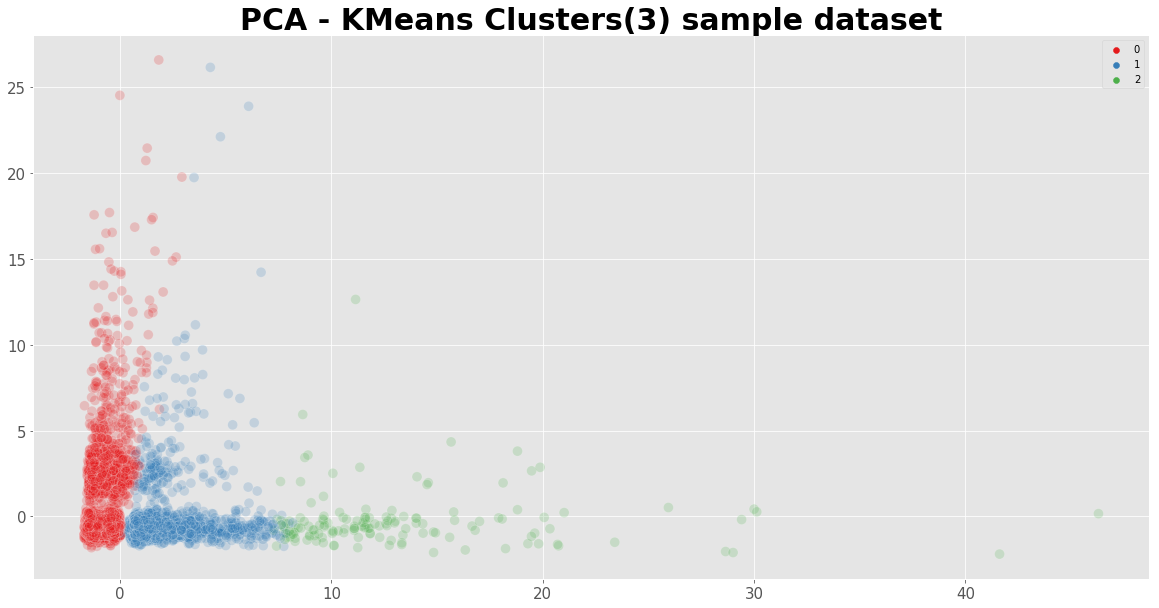

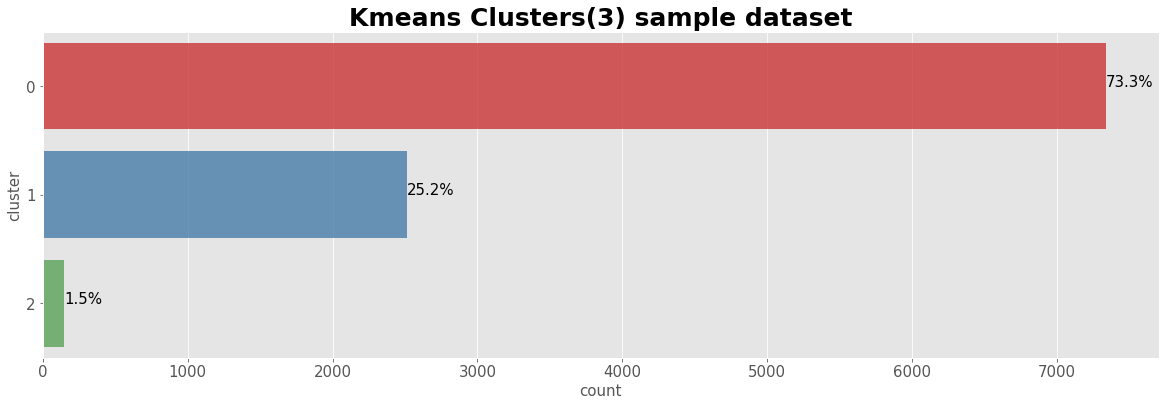

In [22]:
kmeans_clustering_pca(X_sample, k=3, get_model='KMeans3_X_sample', get_folder='p5_00_model/', 
                      add_title='sample dataset')

Les clusters ne sont pas tous de taille équivalente, une forte supériorité de l'activité est facilement identifiée avec un cluster à plus de 70%.\
**Le partitionnement en 4 clusters pourra peut-être apporter une valeur ajoutée en termes  d'interprétation métier.**

In [23]:
#t-SNE (t-Stochastic Neighbour Embedding)
tsne = TSNE(n_components=2)
T = tsne.fit_transform(X_sample)

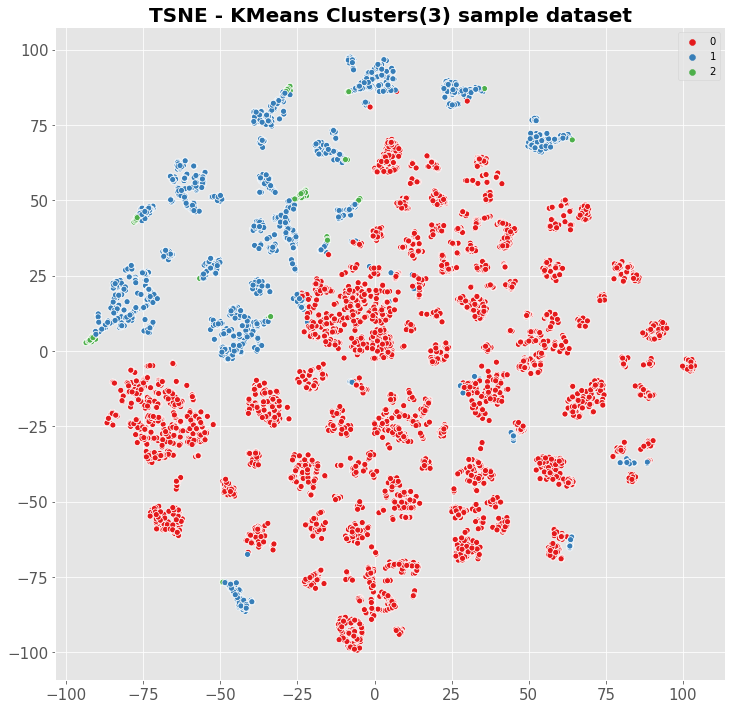

Time TSNE plot: 0.741 seconds


In [25]:
kmeans_clustering_tsne(X_sample, k=3, get_model='KMeans3_X_sample', get_folder='p5_00_model/',
                       add_title='sample dataset')

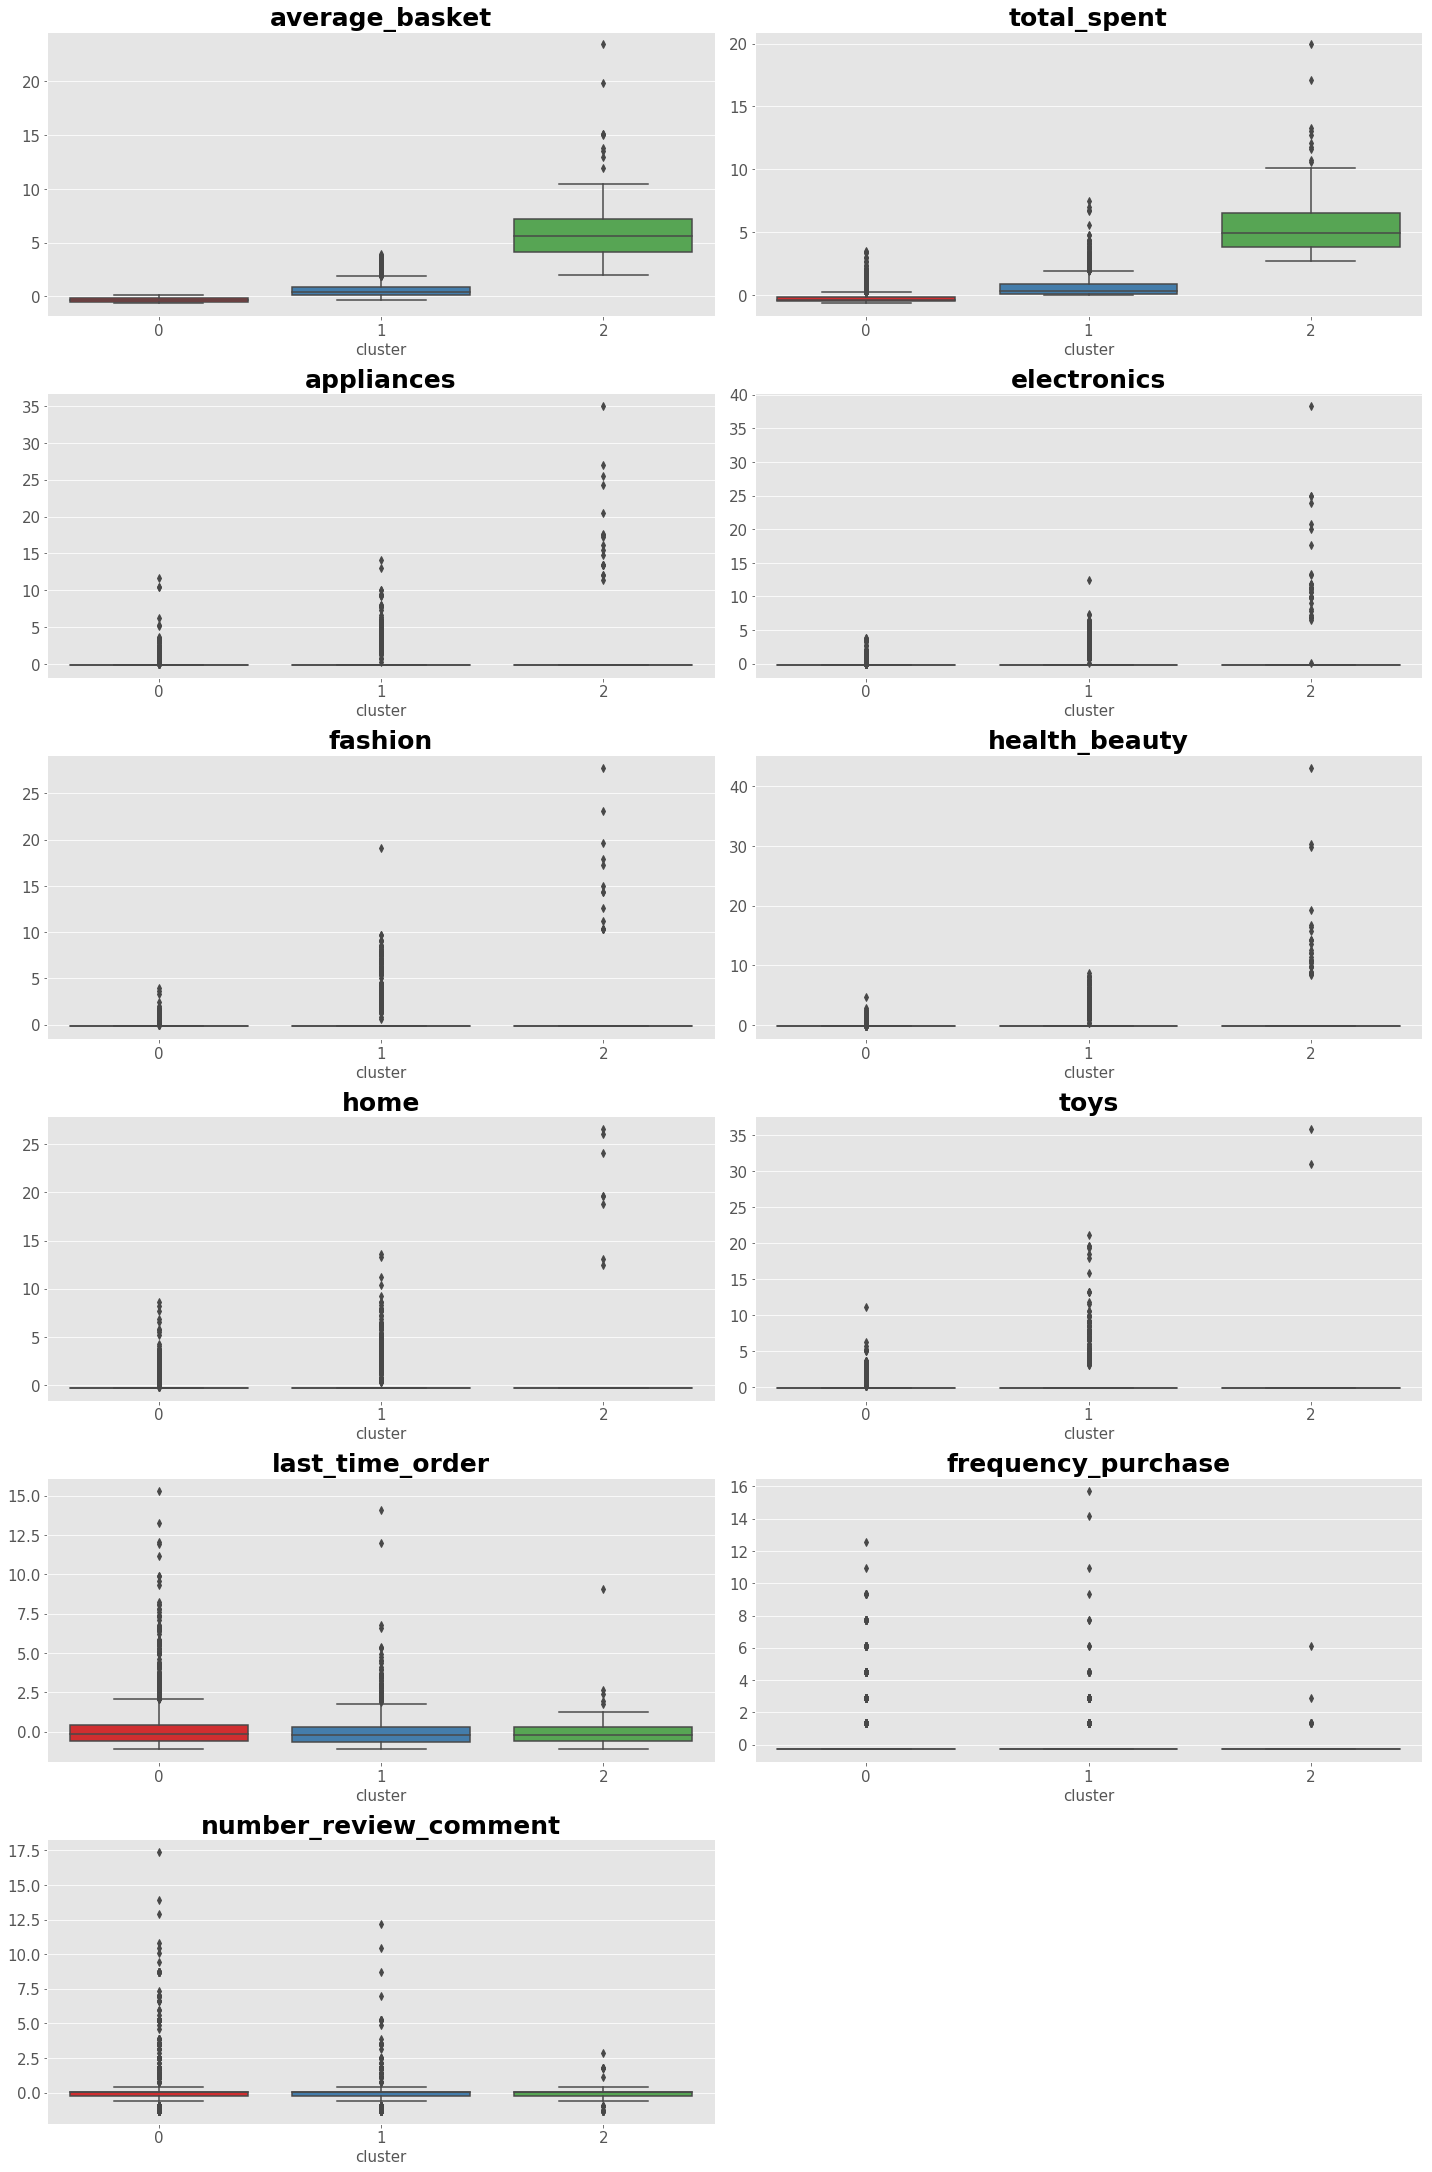

In [26]:
features_kmeans(X_sample, ['average_basket', 'total_spent', 'number_orders', 'last_time_order', 
                           'frequency_purchase', 'number_review_comment', 'home', 'health_beauty', 
                           'fashion', 'electronics', 'appliances', 'toys'], 
                get_model='KMeans3_X_sample', get_folder='p5_00_model/')

Les centroïdes ci-dessous permettent de comparer les clusters entre eux selon les variables. Une analyse peut être faite à partir des centroïdes, ici elle sera faite plus loin dans l'analyse, une fois toutes les optimisations réalisées. **Visuellement la comparaison est possible à partir des éléments ci-dessous :** 

In [27]:
centroids_cls(X_sample, get_model='KMeans3_X_sample', get_folder='p5_00_model/')[1]

average_basket  total_spent  max_order_amount  min_order_amount  \
0       -0.332558    -0.315181         -0.332277         -0.330079   
1        0.635743     0.599377          0.634186          0.631407   
2        6.279967     5.665060          6.239840          6.257408   

   number_of_products_purchased  bucket_quartile_lower25  \
0                      0.028331                 0.189749   
1                     -0.107767                -0.556110   
2                     -0.140661                -0.550475   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0               0.216405               0.208858                -0.597411   
1              -0.569142              -0.577017                 1.652925   
2              -0.578465              -0.590533                 1.669884   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0        0.013573             0.006791            0.008430         0.019075   
1       -0.073858            -0.013973           -0.042826        -0.047613   
2       -0.032736            -0.033151           -0.115755        -0.069201   

   appliances      auto  construction   culture  electronics   fashion  \
0   -0.054468 -0.062198     -0.061830 -0.006970    -0.089202 -0.111779   
1    0.100902  0.144732      0.119060  0.024858     0.130138  0.215263   
2    2.158741  0.353214      0.729637 -0.045904     2.809092  1.282469   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.014346 -0.041663      -0.122655 -0.036745 -0.080538 -0.068936 -0.083992   
1 -0.003585  0.045699       0.219401  0.045887  0.191387  0.118990  0.201222   
2 -0.053599  1.647823       2.558890  1.737595  0.797856  0.655544  0.388148   

       pets  sports_leisure      toys  last_time_order  frequency_purchase  \
0 -0.008057       -0.076555 -0.057713         0.034004            0.028533   
1  0.008835        0.143190  0.161144        -0.070800           -0.107783   
2 -0.084405        1.096201  0.313540        -0.008357           -0.140677   

   number_review_comment  state_MG  state_PR  state_RJ  state_RS  state_SP  \
0               0.024792  0.121200  0.050988  0.121336  0.055487  0.430948   
1              -0.090475  0.109698  0.048092  0.139905  0.048887  0.377583   
2              -0.078178  0.107383  0.067114  0.147651  0.040268  0.255034   

   state_other  
0     0.220041  
1     0.275835  
2     0.382550

In [41]:
kmeans_model(X_sample, k=4, folder='p5_00_model/')

Time: 0.304 seconds


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans Silhouette Score: 0.222
Time pca plot: 2.413 seconds


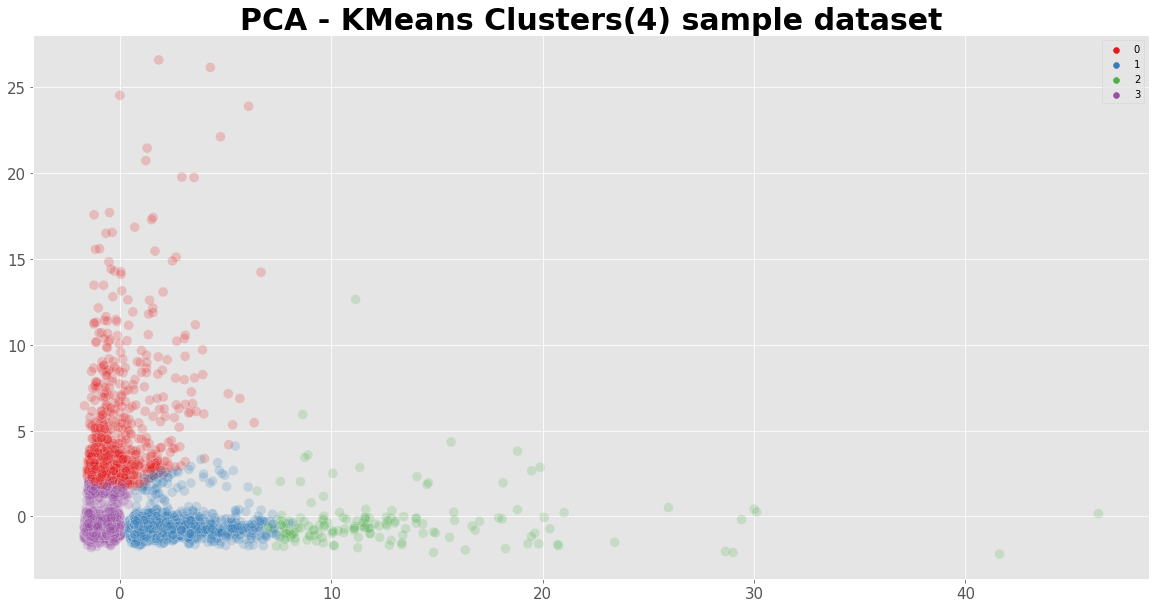

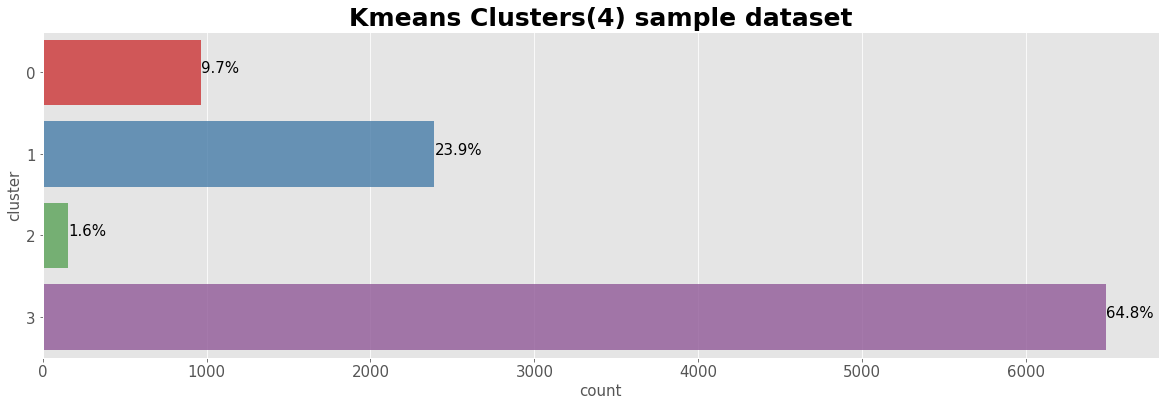

In [42]:
kmeans_clustering_pca(X_sample, k=4, get_model='KMeans4_X_sample', get_folder='p5_00_model/', 
                      add_title='sample dataset')

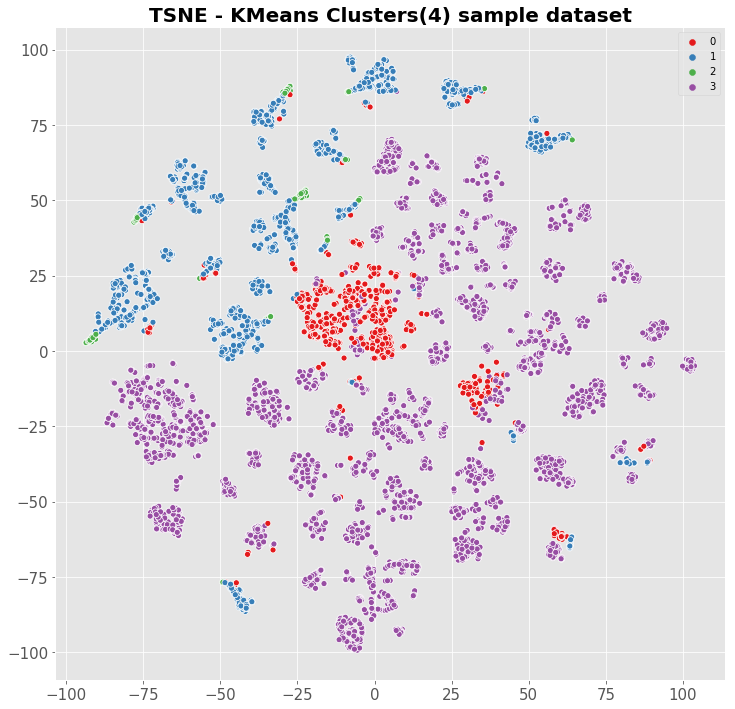

Time TSNE plot: 0.724 seconds


In [43]:
kmeans_clustering_tsne(X=X_sample, k=4, get_model='KMeans4_X_sample', get_folder='p5_00_model/',
                       add_title='sample dataset')

L’algorithme t-SNE qui est une méthode intéressante pour visualiser nos données, seulement il ne sera pas reconduit sur l'ensemble de l'échantillon car trop consommateur en temps de calcul sur ma machine.

In [44]:
centroids_cls(X_sample, get_model='KMeans4_X_sample', get_folder='p5_00_model/')[1]

average_basket  total_spent  max_order_amount  min_order_amount  \
0       -0.263070     0.325143         -0.198255         -0.317963   
1        0.642629     0.526811          0.630273          0.648358   
2        6.128479     5.538002          6.090303          6.105625   
3       -0.331144    -0.370549         -0.336549         -0.323905   

   number_of_products_purchased  bucket_quartile_lower25  \
0                      2.165954                 0.212976   
1                     -0.241707                -0.557981   
2                     -0.138124                -0.550883   
3                     -0.243881                 0.173403   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0               0.098524               0.025388                -0.324199   
1              -0.576500              -0.587618                 1.672291   
2              -0.578465              -0.590533                 1.670274   
3               0.222431               0.225869                -0.604414   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0        0.347295             1.603895           -0.027747         0.153740   
1       -0.113367            -0.096098           -0.047207        -0.053651   
2       -0.019072            -0.060213           -0.074015        -0.037564   
3       -0.023652            -0.201038            0.013591        -0.000753   

   appliances      auto  construction   culture  electronics   fashion  \
0    0.113235 -0.017229      0.087692 -0.019280     0.053170 -0.084607   
1    0.081467  0.140974      0.088221  0.028589     0.102533  0.213571   
2    2.172105  0.329534      0.687874 -0.045904     2.657386  1.333952   
3   -0.072373 -0.063444     -0.069234 -0.005841    -0.095921 -0.111823   

       food    garden  health_beauty   hobbies      home    office    others  \
0  0.055671  0.098241      -0.033497 -0.017659  0.466950  0.068572 -0.090671   
1 -0.016050  0.047003       0.205040  0.039141  0.125824  0.096832  0.215836   
2 -0.053599  1.558714       2.524148  1.784785  0.810374  0.615671  0.361396   
3 -0.019945 -0.061256      -0.126492 -0.038834 -0.134201 -0.077572 -0.082773   

       pets  sports_leisure      toys  last_time_order  frequency_purchase  \
0  0.093350        0.025778 -0.023210         1.538763            2.165917   
1  0.013751        0.143367  0.158548        -0.171624           -0.241722   
2 -0.084405        1.030971  0.290594        -0.033483           -0.138140   
3 -0.024583       -0.087493 -0.057556        -0.154825           -0.243649   

   number_review_comment  state_MG  state_PR  state_RJ  state_RS  state_SP  \
0               1.891836  0.120868  0.046488  0.113636  0.058884  0.443182   
1              -0.200134  0.111715  0.046025  0.141004  0.047280  0.377824   
2              -0.070487  0.101911  0.076433  0.152866  0.038217  0.254777   
3              -0.215781  0.120432  0.052120  0.122282  0.055513  0.428219   

   state_other  
0     0.216942  
1     0.276151  
2     0.375796  
3     0.221434

La première remarque à faire pour ces deux clustering est la stabilité du coefficient de silhouette.

### Modélisation avec un algorithme de Clustering Hiérarchique
L'algorithme cherche à créer des clusters homogènes bien séparés par récurrence, et permet de partitionner un jeu de données de manière hiérarchique. À chaque étape, on agrège les deux clusters les plus proches.

### Quelques fonctions utiles à l'analyse…

In [32]:
def model_save(X, n_cls, folder):
    '''Save my model in a folder for future use.'''
    start_time = time.time()
    model = AgglomerativeClustering(n_clusters=n_cls).fit(X)
    filename = str(model).split('(')[0]
    pickle.dump(model, open(folder + filename + str(n_cls) + '_' + str(X.name) + '.pkl', 'wb'))
    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    return model

In [33]:
def plot_dendrogram(X, **kwargs):
    '''Plot Hierarchical Clustering Dendrogram.'''
    model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
    model = model.fit(X)
    
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    show()


In [34]:
def clusters_cah(X, model):
    '''Percentage distribution clusters.'''
    start_time = time.time()
    
    Z = linkage(X, method = 'ward', metric='euclidean')

    fclusters = fcluster(Z, 4, criterion='maxclust')
    idg = np.argsort(fclusters)

    clusters = pd.DataFrame(X.index[idg], fclusters[idg]).reset_index()
    clusters = clusters.rename(columns={'index':'cluster'})

    ax, fig = plt.subplots(figsize=(20,6)) 
    #clusters = pd.DataFrame(model.labels_, columns=['cluster'])
    ax = sns.countplot(data=clusters, y='cluster', palette = 'Set1', alpha=.8, 
                        order=clusters['cluster'].value_counts(sort=False).index, orient='h')

    for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_width()/len(clusters))
            x = p.get_x() + p.get_width()
            y = p.get_y() + p.get_height()/2
            ax.annotate(percentage, (x, y), fontsize=15)
            ax.set_title('Hierarchical Clusters')

    print("Time: {} seconds".format(round(time.time() - start_time, 3)))
    show()


In [35]:
def crosstab_cah_kmeans(X, n_clusters, model_cah, model_kmeans):
    '''Crossing of kmeans and cah tables to see similarities.'''    

    Z = linkage(X, method = 'ward', metric='euclidean')

    fclusters = fcluster(Z, n_clusters, criterion='maxclust')
    idg = np.argsort(fclusters)

    clusters = pd.DataFrame(X.index[idg], fclusters[idg]).reset_index()
    clusters = clusters.rename(columns={'index':'cluster'}).set_index('customer_unique_id')
    
    centroids_cah = pd.merge(X, clusters, left_index=True, right_index=True)
    result = pd.crosstab(clusters.cluster, model_kmeans.labels_, rownames=['cah'], colnames=['kmeans'])
    
    return centroids_cah, result

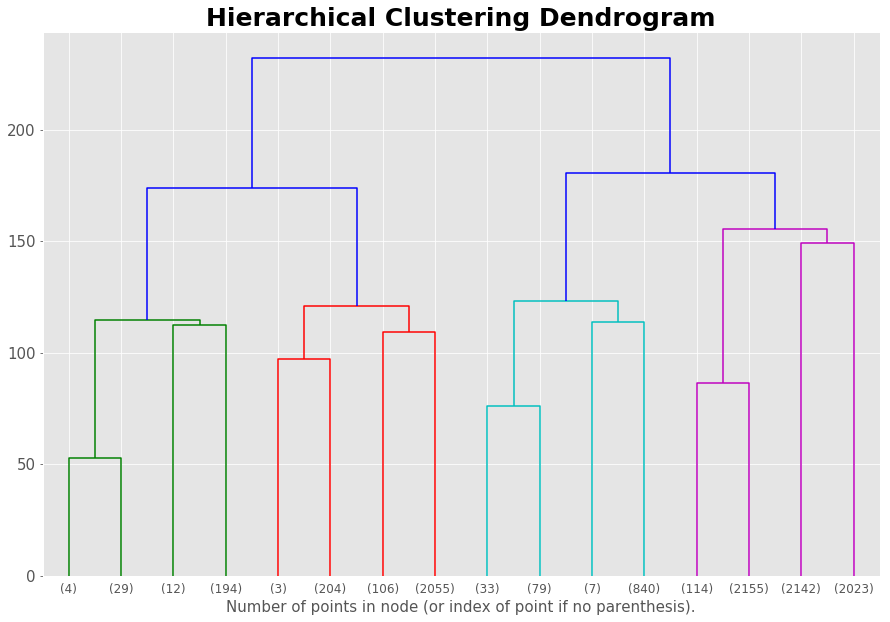

In [36]:
plot_dendrogram(X_sample, truncate_mode='level', p=3)

**Le dendrogramme suggère un partitionnement en 4 groupes**. Voyons ce que donne la projection via le PCA et le T-SNE.

In [37]:
cls4_cah = model_save(X_sample, n_cls=4, folder='p5_00_model/')
cls4_cah

Time: 4.728 seconds


AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=4)

CAH Silhouette Score: 0.2112277028670016


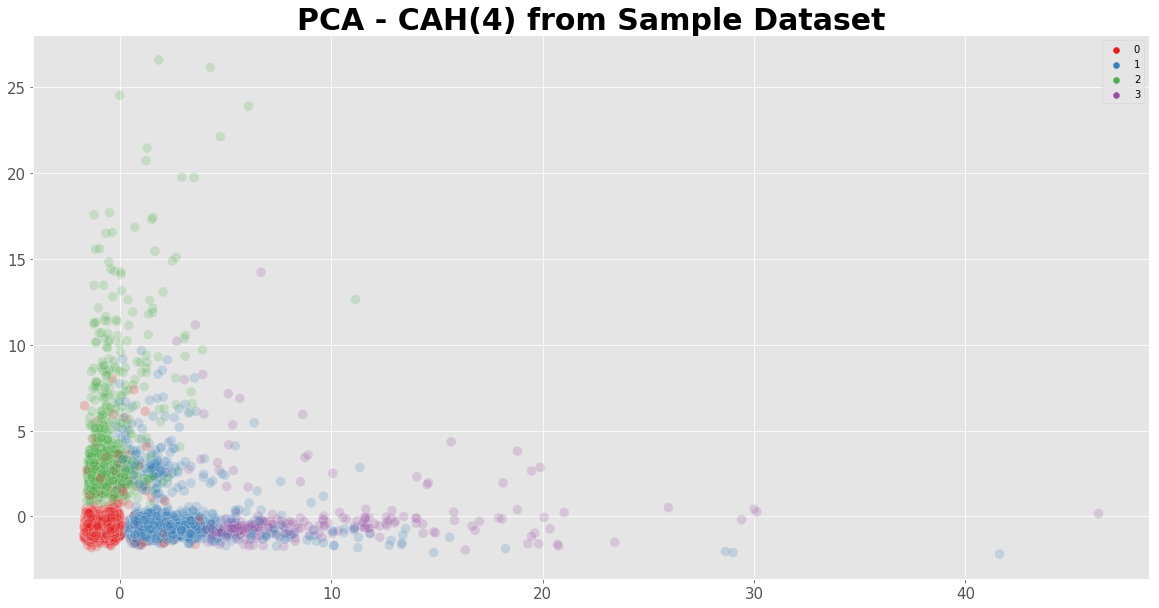

In [38]:
pca = PCA(svd_solver='full').fit(X_sample)
X_projected = pca.transform(X_sample)

plt.figure(figsize=(20, 10))
sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                hue = cls4_cah.labels_, 
                palette = 'Set1',
                s=100, alpha=0.2).set_title('PCA - CAH(4) from Sample Dataset', fontsize=30)

print('CAH Silhouette Score: {}'.format(
    metrics.silhouette_score(X_projected, cls4_cah.labels_, metric='euclidean')))

show()

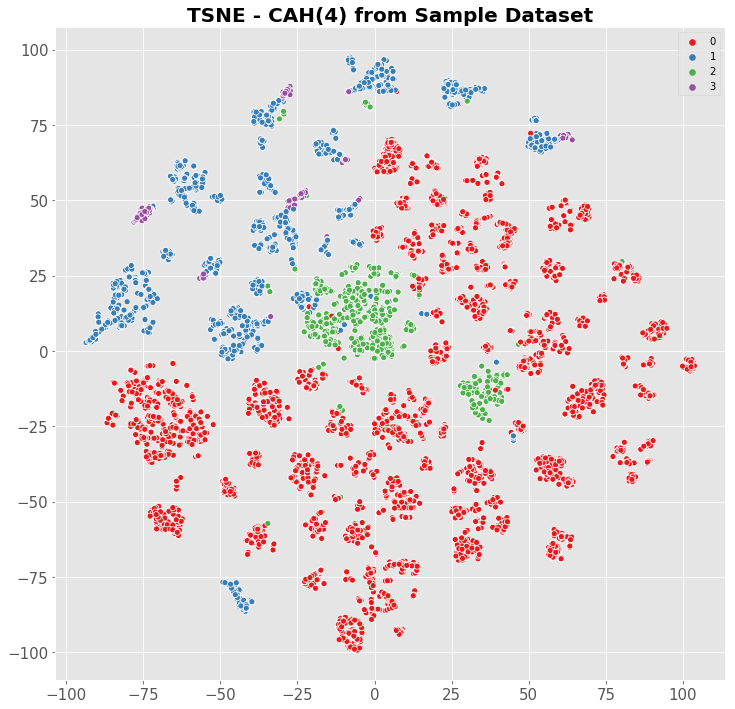

In [39]:
plt.figure(figsize=(12, 12))
sns.scatterplot(T[:,0], T[:,1], hue=cls4_cah.labels_, palette='Set1')
plt.title('TSNE - CAH(4) from Sample Dataset', fontsize=20)
show()

Time: 4.743 seconds


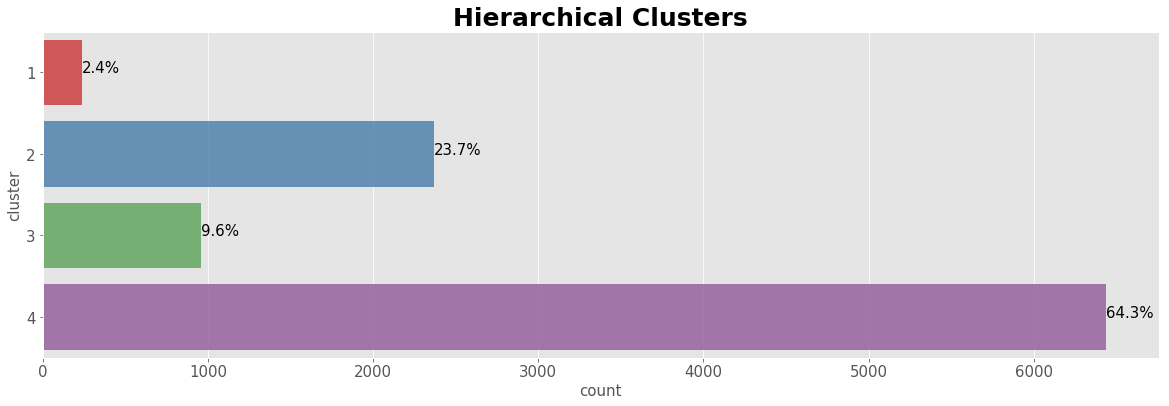

In [40]:
clusters_cah(X_sample, cls4_cah)

L'approche par clustering hierarchique est intéressante, relativement assez proche du KMeans. Ceci étant, le test a été effectué sur un échantillon 9 fois plus petit que celui d'origine, de manière à optimiser (et faciliter les tests) les temps de calcul. **Le clustering hierarchique ne sera pas la modélisation optimale sur l'ensemble des individus, d'autant plus que la population augmentera sans doute dans le temps.**

In [48]:
cls4_kmeans = pickle.load(open('p5_00_model/KMeans4_X_sample.pkl', 'rb'))
crosstab_cah_kmeans(X_sample, 4, cls4_cah, cls4_kmeans)[0].groupby('cluster').mean()

average_basket  total_spent  max_order_amount  min_order_amount  \
cluster                                                                    
1              4.270672     3.945837          4.251860          4.247385   
2              0.619408     0.553811          0.618242          0.614841   
3             -0.339161     0.132734         -0.300443         -0.369363   
4             -0.321244    -0.363778         -0.326884         -0.313813   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
1                            0.017344                -0.558480   
2                           -0.143155                -0.553615   
3                            2.048521                 0.369890   
4                           -0.265941                 0.155474   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
1                    -0.568638              -0.580819   
2                    -0.564592              -0.548819   
3                     0.163040              -0.032984   
4                     0.215730               0.227258   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
1                       1.658442       -0.061478             0.112353   
2                       1.618390       -0.112257             0.004247   
3                      -0.480841        0.580340             1.335074   
4                      -0.581938       -0.057163            -0.202757   

         payment_debit_card  payment_voucher  appliances      auto  \
cluster                                                              
1                 -0.115755         0.009772    1.853446 -0.111507   
2                 -0.112989        -0.072680    0.035546  0.186234   
3                 -0.115755         0.199051    0.130196 -0.056653   
4                  0.053320        -0.001772   -0.074033 -0.062180   

         construction   culture  electronics   fashion      food    garden  \
cluster                                                                      
1            1.128548 -0.045904     2.128840  2.313518 -0.053599  1.052155   
2            0.071085  0.025312     0.065280  0.080902 -0.053599  0.076737   
3           -0.038150 -0.023357     0.069343 -0.114323 -0.051245  0.033361   
4           -0.069481 -0.003441    -0.099263 -0.112307  0.010358 -0.063820   

         health_beauty   hobbies      home    office    others      pets  \
cluster                                                                    
1            -0.238383  0.500793  0.280788  0.883601  1.510761 -0.084405   
2             0.421876  0.113697  0.231537  0.076241  0.081625 -0.084405   
3            -0.085162 -0.036387  0.291364  0.000076 -0.095075 -0.069428   
4            -0.127583 -0.038782 -0.137558 -0.077834 -0.080135  0.036863   

         sports_leisure      toys  last_time_order  frequency_purchase  \
cluster                                                                  
1              0.614142 -0.136780         0.041005            0.017327   
2              0.125240  0.203477        -0.089837           -0.143170   
3              0.083715 -0.107572         1.329412            2.050159   
4             -0.087376 -0.049398        -0.155400           -0.265956   

         number_review_comment  state_MG  state_PR  state_RJ  state_RS  \
cluster                                                                  
1                    -0.001068  0.104603  0.071130  0.146444  0.041841   
2                    -0.107247  0.111392  0.045992  0.140084  0.048101   
3                     1.544494  0.120959  0.046924  0.123045  0.057351   
4                    -0.199031  0.120609  0.052067  0.121076  0.055486   

         state_SP  state_other  
cluster                         
1        0.288703     0.347280  
2        0.379325     0.275105  
3   

In [49]:
crosstab_cah_kmeans(X_sample, 4, cls4_cah, cls4_kmeans)[1]

kmeans    0     1    2     3
cah                         
1        21    52    2   164
2       232   561   38  1537
3        75   215   17   652
4       640  1562  100  4132

Le parallèle entre les deux méthodes (KMeans et CAH) permet d'appuyer l'hypothèse d'une meilleure interprétabilité du contexte métier. Le clustering en 4 partitions permet de mieux différencier notre population selon des caractéritiques similaires entre eux pour l'aide à la décision des opérations Marketing.

Voyons comment améliorer la modélisation retenue KMeans, l'évaluer dans le temps, sa stabilité, etc…

### Modélisation par l'estimation de la densité locale DBSCAN
L'algorithme DBSCAN est difficile à utiliser sur des jeux de données à grande dimension. Ceci étant, après avoir déterminé l'epsilon optimal, un test de modélisation est nécessaire pour visualiser ce type de clustering.

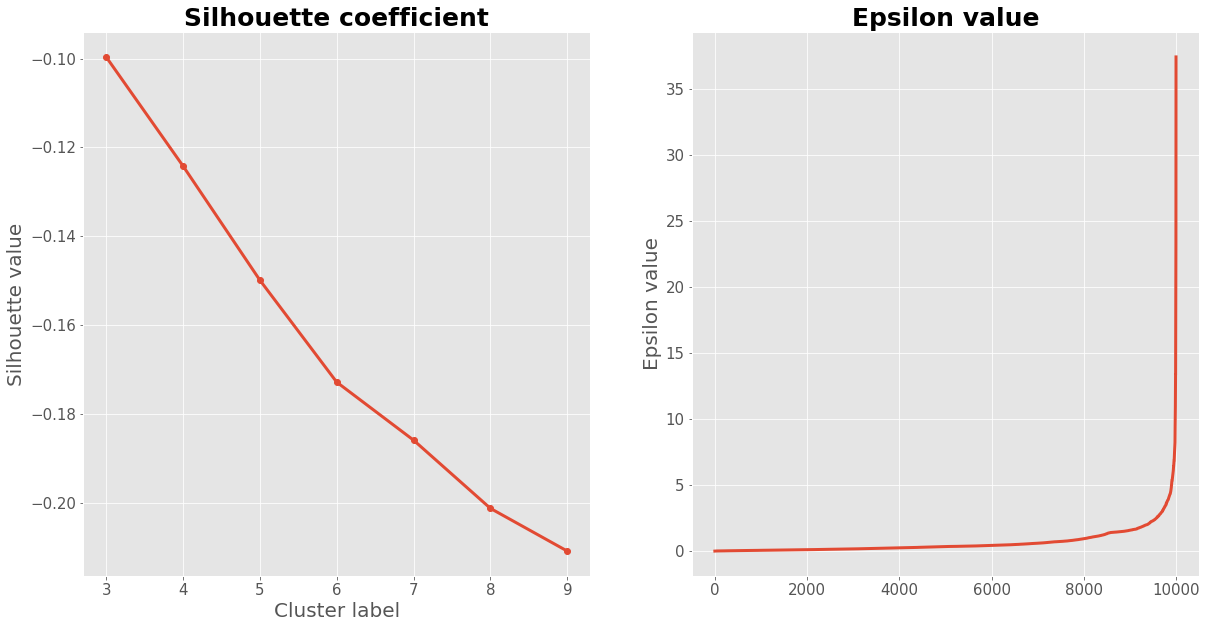

In [50]:
from sklearn.neighbors import NearestNeighbors
plt.figure(figsize=(20,10))
silhouettes = [] 

plt.subplot(121)
for k in range(3,10): 
    dbs = DBSCAN(min_samples=k)  
    dbs.fit(X_sample)
    silh = metrics.silhouette_score(X_sample, dbs.labels_)
    silhouettes.append(silh)
plt.plot(range(3,10), silhouettes, marker='o', linewidth=3)
plt.xlabel('Cluster label', fontsize=20)
plt.ylabel('Silhouette value', fontsize=20)
plt.title("Silhouette coefficient", fontsize=25)

plt.subplot(122)
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X_sample)
distances, indices = nearest_neighbors.kneighbors(X_sample)
distances = np.sort(distances, axis=0)[:, 1]
plt.plot(distances, linewidth=3)
plt.xlabel('', fontsize=20)
plt.ylabel('Epsilon value', fontsize=20)
plt.title("Epsilon value", fontsize=25)

plt.show()

In [51]:
cls_dbs = DBSCAN(eps = 3, min_samples=5)  
cls_dbs.fit(X_sample)

DBSCAN(algorithm='auto', eps=3, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=5, n_jobs=None, p=None)

DBSCAN Silhouette Score: -0.24973181301786798


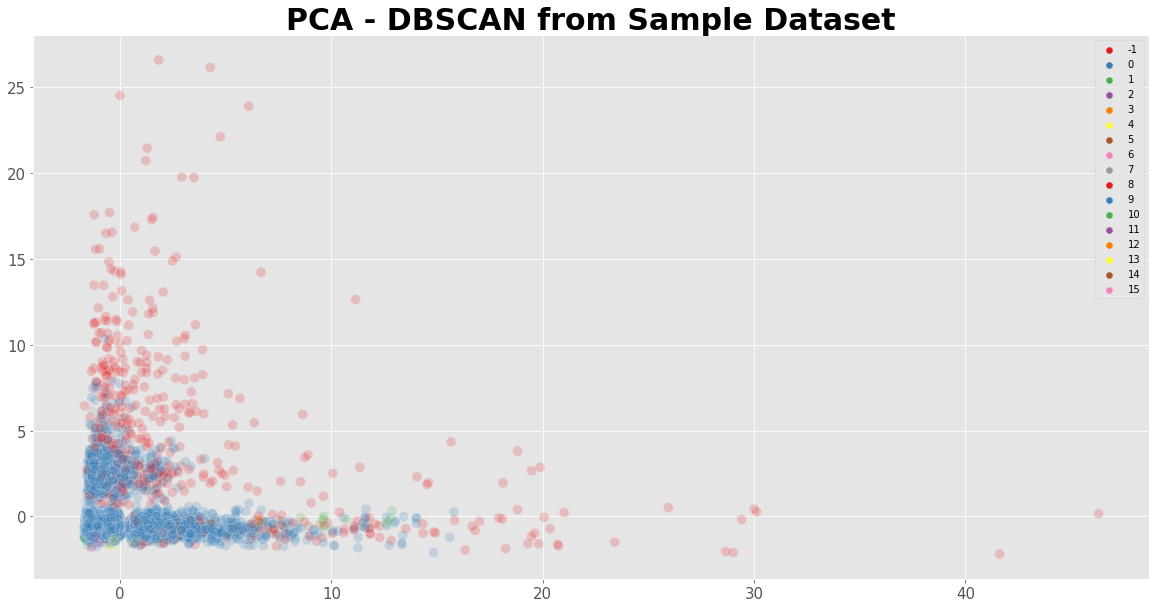

In [52]:
pca = PCA(n_components=20).fit(X_sample)
X_projected = pca.transform(X_sample)

plt.figure(figsize=(20, 10))
sns.scatterplot(X_projected[:,0], X_projected[:,1], 
                hue = cls_dbs.labels_, 
                palette = 'Set1',
                s=100, alpha=0.2).set_title('PCA - DBSCAN from Sample Dataset', fontsize=30)

print('DBSCAN Silhouette Score: {}'.format(
    metrics.silhouette_score(X_projected, cls_dbs.labels_, metric='euclidean')))

show()

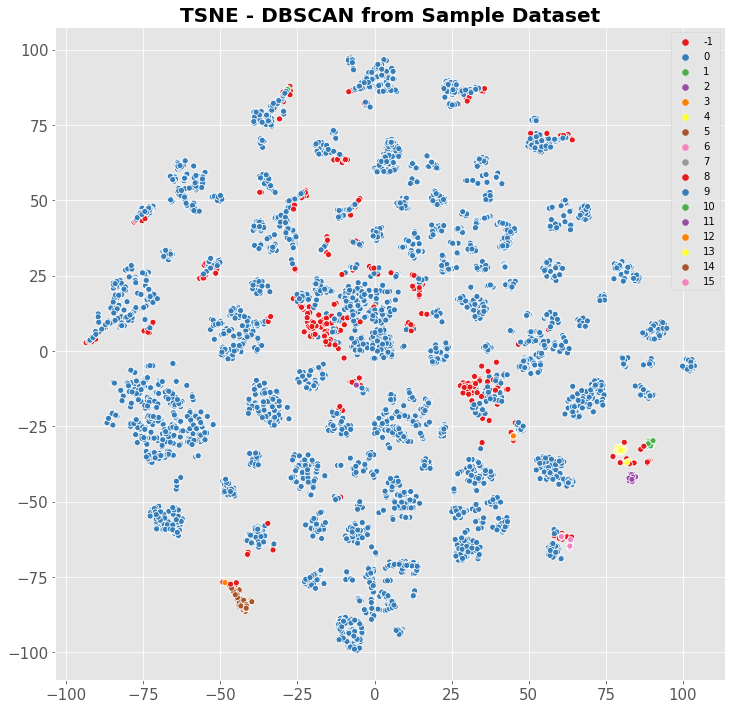

In [53]:
plt.figure(figsize=(12,12))
sns.scatterplot(T[:,0], T[:,1], hue = cls_dbs.labels_, palette='Set1')
plt.title('TSNE - DBSCAN from Sample Dataset', fontsize=20)
show()

Malgré l'avantage du DBSCAN d'être efficace en temps de calcul sans requérir de prédéfinir le nombre de clusters, **le clustering par densité n'est pas efficace sur notre échantillon.**

# Modélisation KMeans sur l'ensemble de l'échantillon
Les premières étapes KMeans ont été exercées sur un échantillon aléatoire de 10000 individus, rappelons que l'échantillon de travail comporte une population 9 fois plus grande. Voyons si les résultats restents stables.

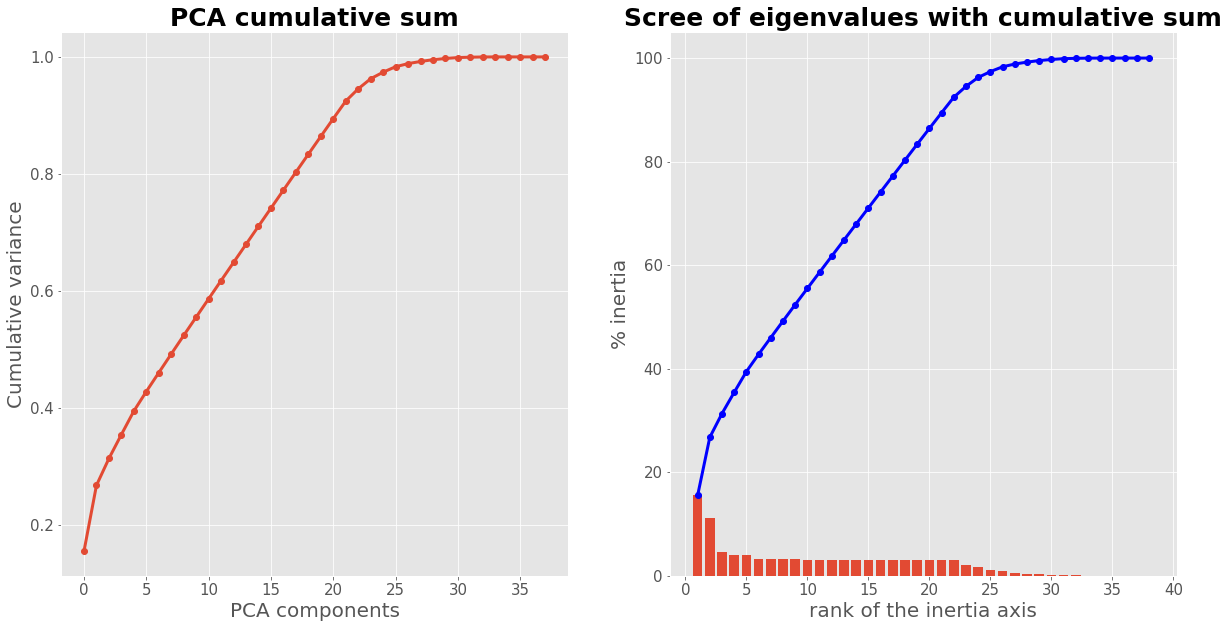

In [55]:
pca_eigenvalues(X)

In [57]:
pca = PCA(n_components=20).fit(X)
pca.explained_variance_ratio_.cumsum()

array([0.15514154, 0.26758778, 0.31348538, 0.35442948, 0.39457293,
       0.42797274, 0.46015672, 0.49213577, 0.52383637, 0.55519003,
       0.58644892, 0.61761121, 0.64866598, 0.6796503 , 0.71059595,
       0.7414486 , 0.77224246, 0.80299289, 0.83367932, 0.86416245])

Stabilité des PCA Components entre l'échantillonnage et le jeu de données complet.

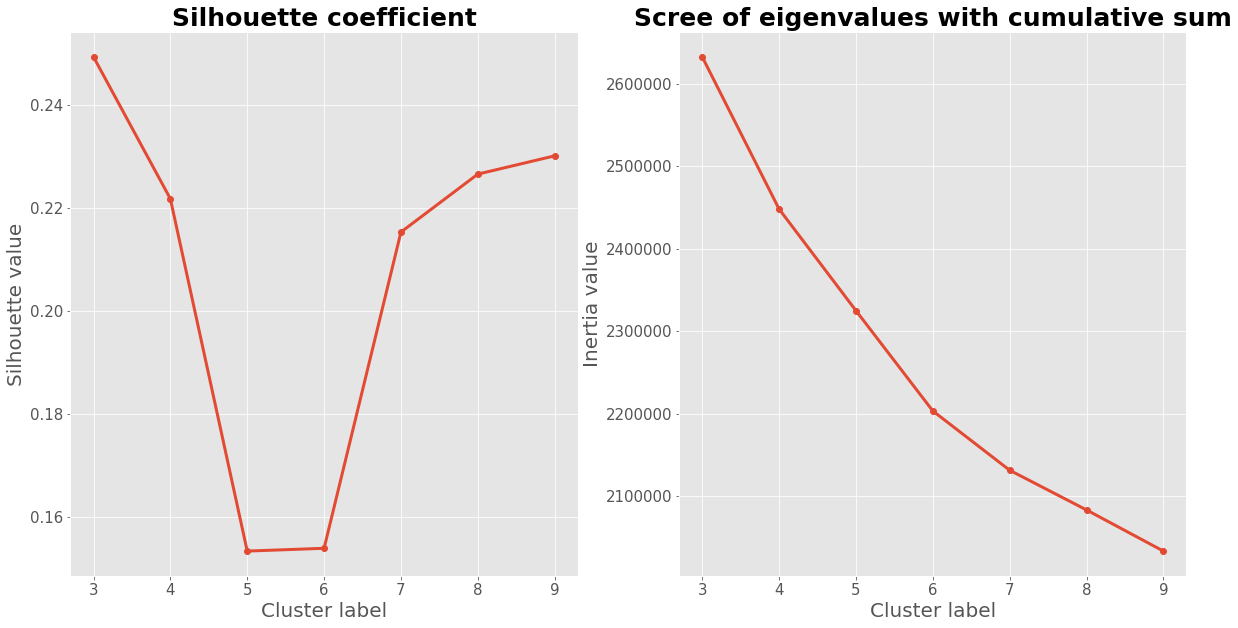

Time: 888.118 seconds


In [260]:
silhouette_inertia(X)

Notons que les coefficients de silhouette évoluent de la même manière entre l'échantillonnage et le jeu de données complet.

In [59]:
kmeans_model(X, k=4, folder='p5_00_model/')

Time: 2.841 seconds


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans Silhouette Score: 0.222
Time pca plot: 129.961 seconds


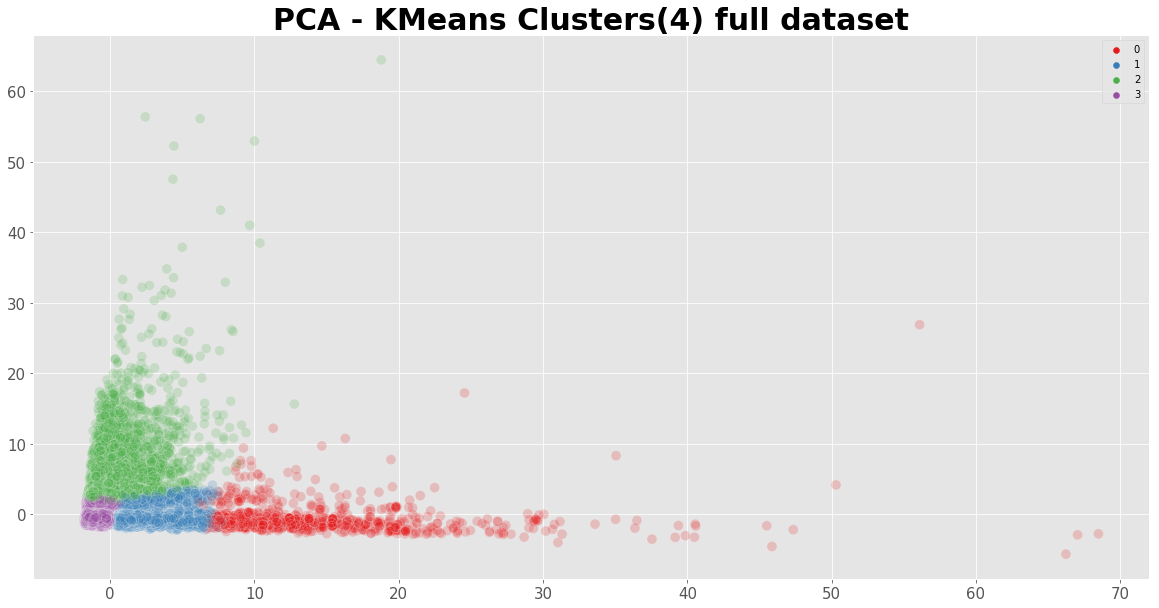

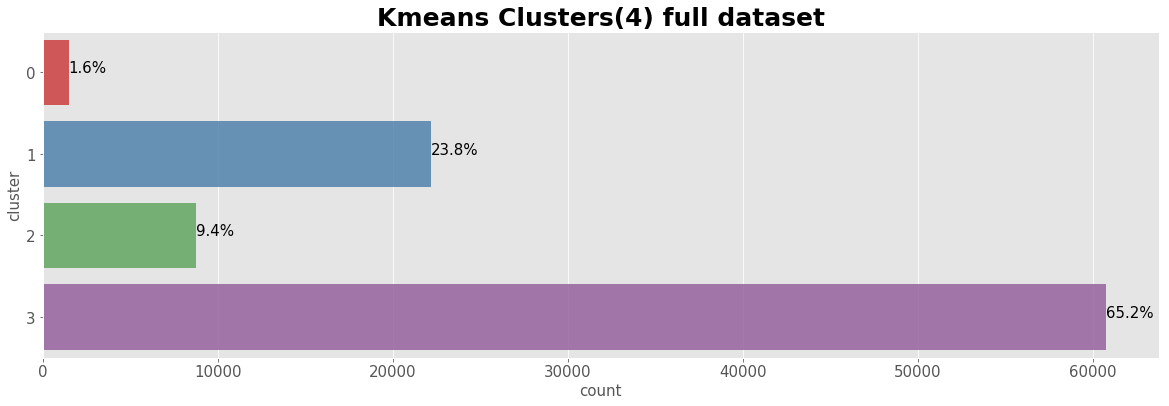

In [60]:
kmeans_clustering_pca(X, k=4, get_model='KMeans4_X', get_folder='p5_00_model/', add_title='full dataset')

In [55]:
data_cls(olistbr, get_model='KMeans4_X', get_folder='p5_00_model/')

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2          129.90       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90        27.19   
0000f46a3911fa3c0805444483337064           69.00        86.22   
0000f6ccb0745a6a4b88665a16c9f078           25.99        43.62   
0004aac84e0df4da2b147fca70cf8255          180.00       196.89   
...                                          ...          ...   
fe6b113acee46594f596e9d8dce810dc           29.00        36.78   
fe6b273b109be3711e9ab252d3173aa1           59.90        71.82   
fe6b54cd897e53d07ecec69074ddf7b9           79.90        91.66   
fe6baf7ab3cf7378de7bfb5f49db489c           57.00        66.15   
fe6cae7b4ec50b71fe57349e39e01e4c           15.90        23.29   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2            129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90             18.90   
0000f46a3911fa3c0805444483337064             69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00            180.00   
...                                            ...               ...   
fe6b113acee46594f596e9d8dce810dc             29.00             29.00   
fe6b273b109be3711e9ab252d3173aa1             59.90             59.90   
fe6b54cd897e53d07ecec69074ddf7b9             79.90             79.90   
fe6baf7ab3cf7378de7bfb5f49db489c             57.00             57.00   
fe6cae7b4ec50b71fe57349e39e01e4c             15.90             15.90   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fe6b113acee46594f596e9d8dce810dc                           1.0   
fe6b273b109be3711e9ab252d3173aa1                           1.0   
fe6b54cd897e53d07ecec69074ddf7b9                           1.0   
fe6baf7ab3cf7378de7bfb5f49db489c                           1.0   
fe6cae7b4ec50b71fe57349e39e01e4c                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
fe6b113acee46594f596e9d8dce810dc                      1.0   
fe6b273b109be3711e9ab252d3173aa1                      0.0   
fe6b54cd897e53d07ecec69074ddf7b9                      0.0   
fe6baf7ab3cf7378de7bfb5f49db489c                      0.0   
fe6cae7b4ec50b71fe57349e39e01e4c                      1.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
fe6b113acee46594f596e9d8dce810dc                    0.0   
fe6b273b109be3711e9ab252d3173aa1                    1.0   
fe6b54cd

In [135]:
centroids_cls(X, get_model='KMeans4_X', get_folder='p5_00_model/')[1].T

0         1         2         3
average_basket                5.765688  0.630775 -0.263392 -0.332278
total_spent                   5.297291  0.528437  0.343587 -0.370214
max_order_amount              5.759186  0.619737 -0.195626 -0.337781
min_order_amount              5.729365  0.635283 -0.320148 -0.324931
number_of_products_purchased -0.135383 -0.229481  2.273738 -0.238349
bucket_quartile_lower25      -0.555014 -0.557619  0.237652  0.184985
bucket_quartile_25_50        -0.571902 -0.577405  0.118584  0.204996
bucket_quartile_50_75        -0.589235 -0.585504 -0.037311  0.231710
bucket_quartile_upper75       1.666572  1.670745 -0.305659 -0.604234
payment_boleto               -0.136085 -0.115241  0.421727 -0.013408
payment_credit_card           0.026951 -0.086799  1.618031 -0.202147
payment_debit_card           -0.010271 -0.025851  0.012269  0.008906
payment_voucher              -0.016606 -0.039816  0.130671 -0.002820
appliances                    1.551207  0.066376  0.059568 -0.070210
auto                          1.123695  0.118634 -0.010431 -0.068712
construction                  0.890106  0.089639  0.061477 -0.062948
culture                       0.206617  0.010704 -0.009362 -0.007490
electronics                   2.328797  0.094065  0.049612 -0.098301
fashion                       2.140404  0.198470 -0.052618 -0.117814
food                         -0.050571 -0.006620  0.087213 -0.008934
garden                        1.174623  0.033676  0.091222 -0.055097
health_beauty                 1.855972  0.238432 -0.030110 -0.127642
hobbies                       1.442459  0.019179 -0.026489 -0.038173
home                          0.598219  0.147156  0.462829 -0.133901
office                        0.461312  0.125088  0.106507 -0.071593
others                        0.544963  0.216891 -0.064498 -0.082901
pets                          0.395414  0.041479  0.045285 -0.030721
sports_leisure                1.099769  0.131476  0.079595 -0.085219
toys                          0.153641  0.155531 -0.020917 -0.056976
last_time_order              -0.089554 -0.173531  1.626208 -0.166461
frequency_purchase           -0.135399 -0.229496  2.273701 -0.238338
number_review_comment        -0.150714 -0.204852  2.000840 -0.209395
state_MG                      0.122066  0.117920  0.119730  0.116608
state_PR                      0.048290  0.048739  0.049240  0.052079
state_RJ                      0.144869  0.136694  0.127271  0.125782
state_RS                      0.048960  0.055553  0.056552  0.055191
state_SP                      0.311201  0.357778  0.440763  0.437858
state_other                   0.324614  0.283316  0.206444  0.212481

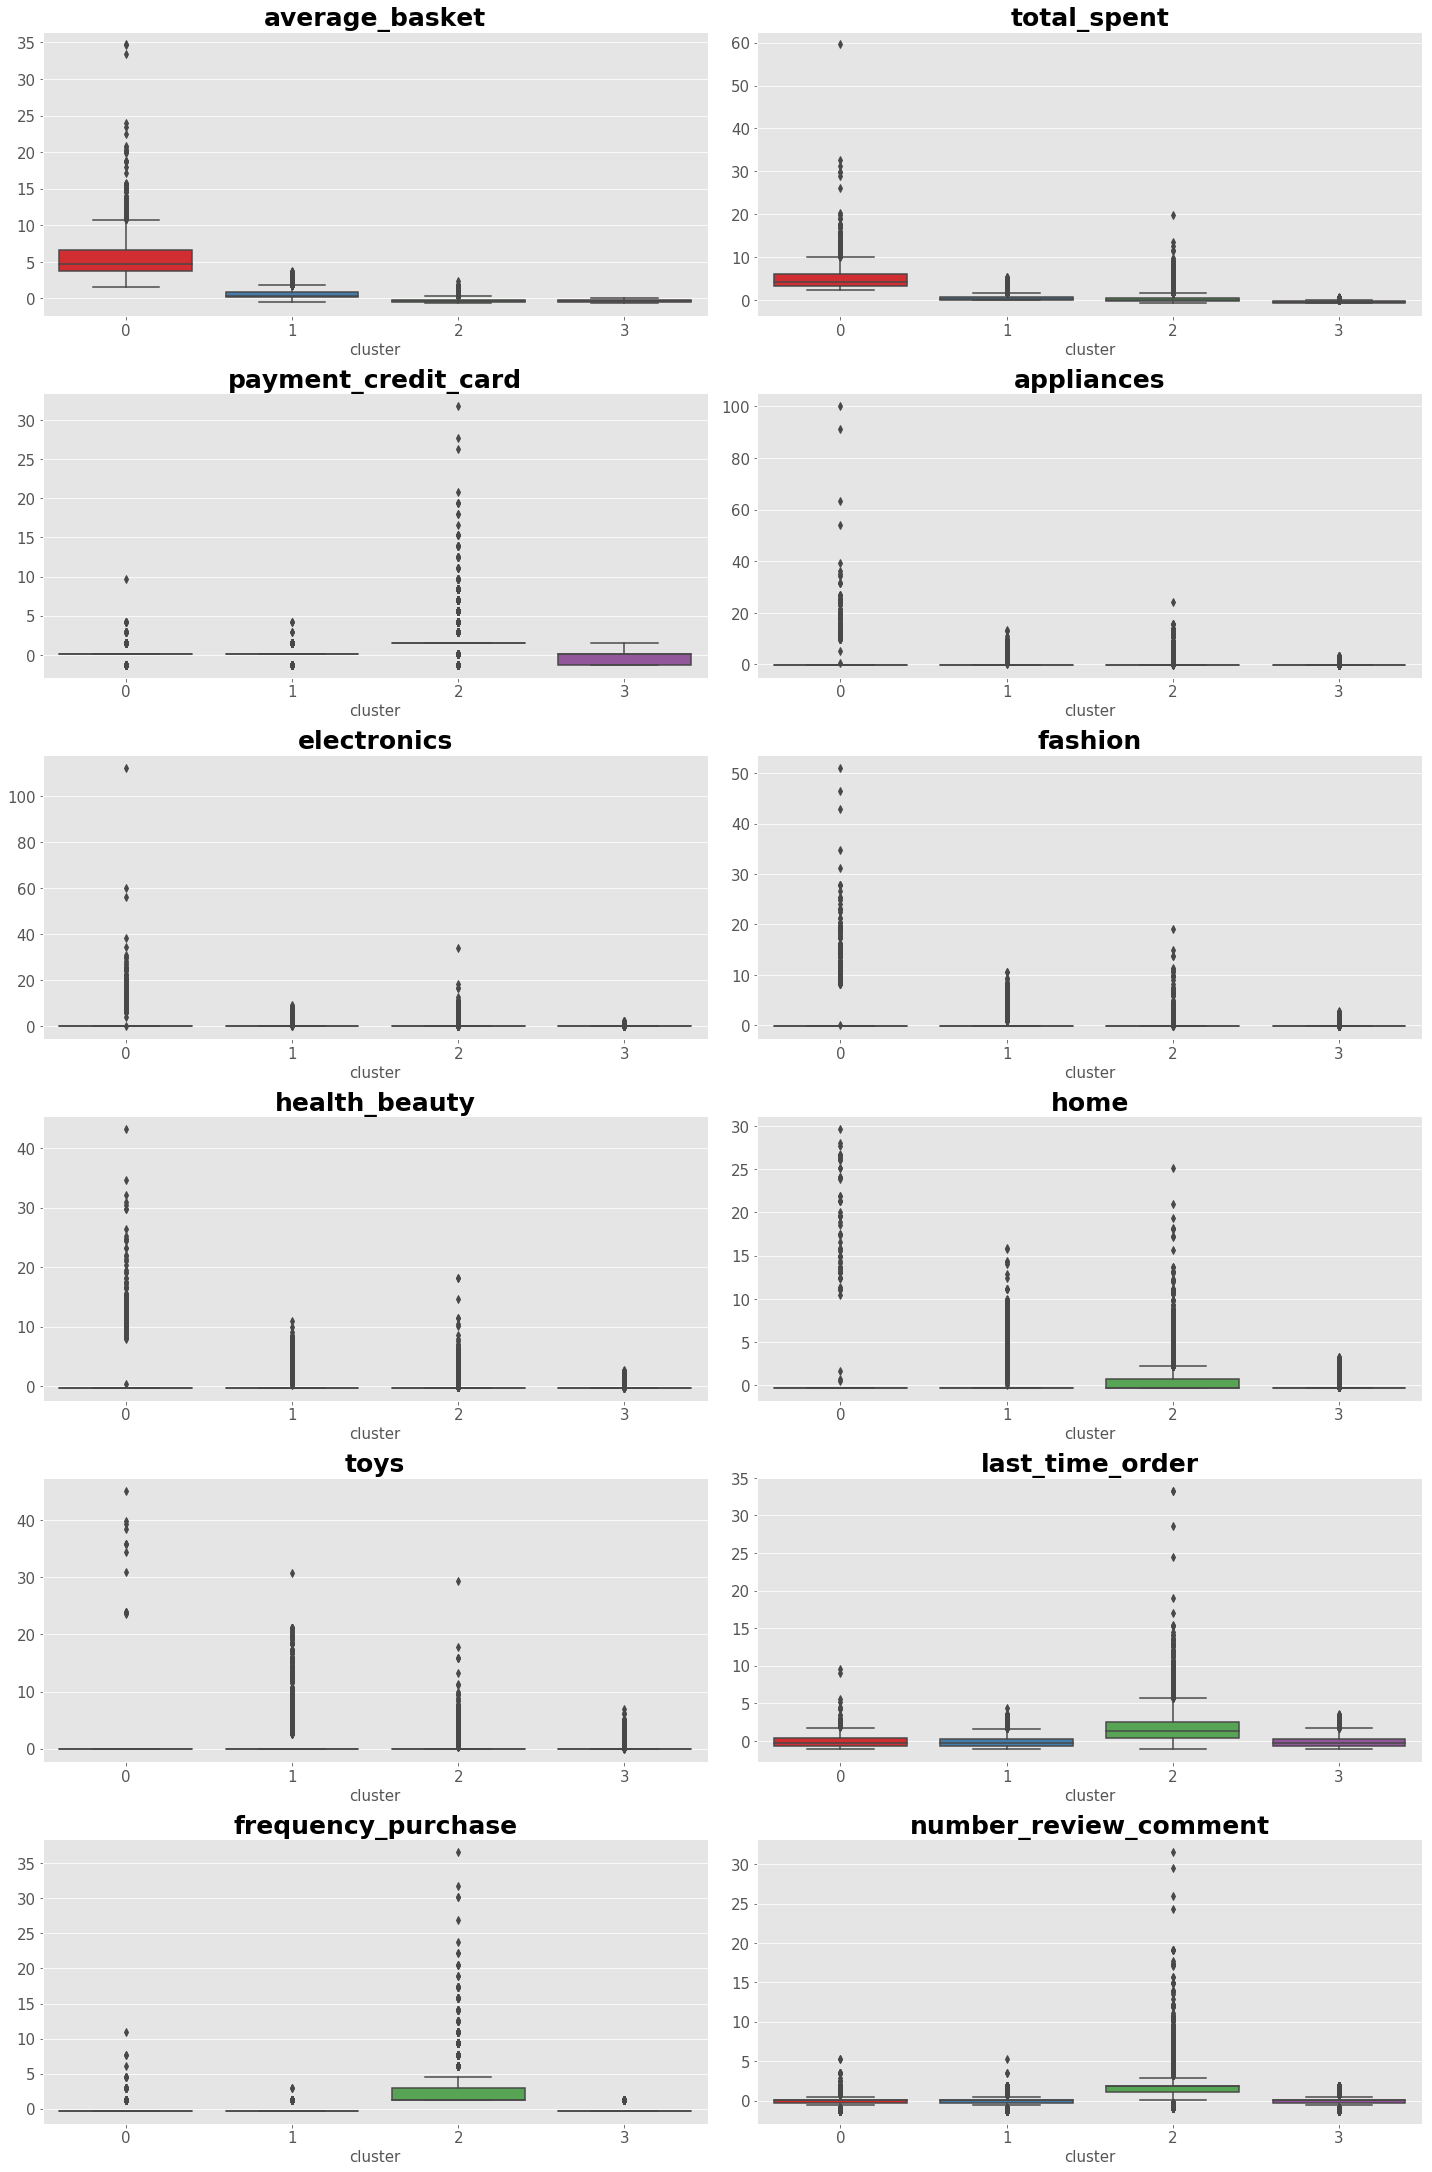

In [263]:
features_kmeans(X, ['average_basket', 'total_spent', 'last_time_order', 'payment_credit_card',  
                    'frequency_purchase', 'number_review_comment', 'home', 
                    'health_beauty', 'fashion', 'electronics', 'appliances', 'toys'], 
                get_model='KMeans4_X', get_folder='p5_00_model/')

In [75]:
data_cls(olistbr, get_model='KMeans4_X', get_folder='p5_00_model/')

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2          129.90       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f           18.90        27.19   
0000f46a3911fa3c0805444483337064           69.00        86.22   
0000f6ccb0745a6a4b88665a16c9f078           25.99        43.62   
0004aac84e0df4da2b147fca70cf8255          180.00       196.89   
...                                          ...          ...   
fe6b113acee46594f596e9d8dce810dc           29.00        36.78   
fe6b273b109be3711e9ab252d3173aa1           59.90        71.82   
fe6b54cd897e53d07ecec69074ddf7b9           79.90        91.66   
fe6baf7ab3cf7378de7bfb5f49db489c           57.00        66.15   
fe6cae7b4ec50b71fe57349e39e01e4c           15.90        23.29   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2            129.90            129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f             18.90             18.90   
0000f46a3911fa3c0805444483337064             69.00             69.00   
0000f6ccb0745a6a4b88665a16c9f078             25.99             25.99   
0004aac84e0df4da2b147fca70cf8255            180.00            180.00   
...                                            ...               ...   
fe6b113acee46594f596e9d8dce810dc             29.00             29.00   
fe6b273b109be3711e9ab252d3173aa1             59.90             59.90   
fe6b54cd897e53d07ecec69074ddf7b9             79.90             79.90   
fe6baf7ab3cf7378de7bfb5f49db489c             57.00             57.00   
fe6cae7b4ec50b71fe57349e39e01e4c             15.90             15.90   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                           1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           1.0   
0000f46a3911fa3c0805444483337064                           1.0   
0000f6ccb0745a6a4b88665a16c9f078                           1.0   
0004aac84e0df4da2b147fca70cf8255                           1.0   
...                                                        ...   
fe6b113acee46594f596e9d8dce810dc                           1.0   
fe6b273b109be3711e9ab252d3173aa1                           1.0   
fe6b54cd897e53d07ecec69074ddf7b9                           1.0   
fe6baf7ab3cf7378de7bfb5f49db489c                           1.0   
fe6cae7b4ec50b71fe57349e39e01e4c                           1.0   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      0.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      0.0   
...                                                   ...   
fe6b113acee46594f596e9d8dce810dc                      1.0   
fe6b273b109be3711e9ab252d3173aa1                      0.0   
fe6b54cd897e53d07ecec69074ddf7b9                      0.0   
fe6baf7ab3cf7378de7bfb5f49db489c                      0.0   
fe6cae7b4ec50b71fe57349e39e01e4c                      1.0   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2                    0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    0.0   
0000f46a3911fa3c0805444483337064                    1.0   
0000f6ccb0745a6a4b88665a16c9f078                    0.0   
0004aac84e0df4da2b147fca70cf8255                    0.0   
...                                                 ...   
fe6b113acee46594f596e9d8dce810dc                    0.0   
fe6b273b109be3711e9ab252d3173aa1                    1.0   
fe6b54cd

In [259]:
cluster_count = data_cls(X, get_model='KMeans4_X', get_folder='p5_00_model/').groupby('cluster').mean()
cluster_count['%spent'] = cluster_count['state_SP'].apply(lambda x: 100*x/cluster_count['total_spent'].sum())
cluster_count

average_basket  total_spent  max_order_amount  min_order_amount  \
cluster                                                                    
0              5.767469     5.299039          5.760993          5.731110   
1              0.630857     0.528545          0.619818          0.635365   
2             -0.262440     0.344822         -0.193431         -0.320356   
3             -0.332277    -0.370190         -0.337776         -0.324934   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
0                           -0.135278                -0.555011   
1                           -0.229420                -0.557619   
2                            2.272689                 0.236517   
3                           -0.238247                 0.184975   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
0                    -0.571898              -0.589234   
1                    -0.577405              -0.585505   
2                     0.118456              -0.037543   
3                     0.205022               0.231694   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
0                       1.666564       -0.135895             0.026886   
1                       1.670746       -0.115296            -0.086699   
2                      -0.304221        0.423804             1.615446   
3                      -0.604234       -0.013435            -0.202126   

         payment_debit_card  payment_voucher  appliances      auto  \
cluster                                                              
0                 -0.010200        -0.016539    1.552332  1.124524   
1                 -0.025868        -0.039749    0.066341  0.118737   
2                  0.012987         0.132623    0.059427 -0.010149   
3                  0.009330        -0.002827   -0.070197 -0.068715   

         construction   culture  electronics   fashion      food    garden  \
cluster                                                                      
0            0.890764  0.206786     2.330473  2.141957 -0.050569  1.166019   
1            0.089607  0.010694     0.094183  0.198403 -0.006629  0.034437   
2            0.061324 -0.008157     0.048421 -0.053270  0.086366  0.090838   
3           -0.062950 -0.007492    -0.098306 -0.117818 -0.008937 -0.055100   

         health_beauty   hobbies      home    office    others      pets  \
cluster                                                                    
0             1.857382  1.443458  0.598818  0.461707  0.545421  0.395736   
1             0.238345  0.019167  0.147076  0.125042  0.216827  0.041456   
2            -0.027657 -0.026603  0.461287  0.111050 -0.062404  0.044505   
3            -0.127650 -0.038173 -0.133884 -0.071596 -0.082905 -0.030724   

         sports_leisure      toys  last_time_order  frequency_purchase  \
cluster                                                                  
0              1.100631  0.153836        -0.089929           -0.135294   
1              0.131419  0.155479        -0.173575           -0.229435   
2              0.079399 -0.019383         1.628230            2.272652   
3             -0.085226 -0.056840        -0.166443           -0.238236   

         number_review_comment  state_MG  state_PR  state_RJ  state_RS  \
cluster                                                                  
0                    -0.150632  0.122148  0.048322  0.144966  0.048993   
1                    -0.204739  0.117944  0.048730  0.136714  0.055543   
2                     2.001377  0.119805  0.049398  0.127186  0.056439   
3                    -0.209343  0.116634  0.052075  0.125791  0.055188   

         state_SP  state_other    %spent  
cluster                                   
0        0.311409     0.324161  5.367077  
1      

**Cluster 0 :** 1,6% des ventes avec des clients au pouvoir d'achat plus élevé, et particulièrement intéressés par les secteurs des technologies et de la mode.

**Cluster 1 :** 23,8% des ventes toujours avec des clients qui dépensent plus que les autres, mais très axés sur les produits en rapport avec les soins du corps.

**Cluster 2 :** 9,4% des ventes pour des clients peu dépensiers, de faibles montants d'achat, pour des produits de l'univers de l'indoor.

**Cluster 3 :** 65,2% des ventes, le plus grand groupe de clients qui s'intéressent à plusieurs familles de produits, sans réelles préférences.


Quelque soit le groupe, la tendance générale est au One-Shot, sans fidélisation, faible fréquence d'achat, etc… Un problème de clients très volatiles, qui semblent intéresser par un achat soit coup de coeur, soit par une bonne affaire à un instant t.

### Nouveau Clustering KMeans sur la plus grande partition (65% CA)
L'objectif ici est de "creuser" le cluster le plus important afin d'en savoir plus sur les éventuelles similitudes de sa population. Pouvons-nous découvrir des niches? 

In [28]:
data_cls3 = data_cls(X, get_model='KMeans4_X', get_folder='p5_00_model/')
data_cls3 = data_cls3 [data_cls3 ['cluster'] == 3]
data_cls3.drop(columns='cluster', inplace=True)
data_cls3.name = "data_cls3"
display(data_cls3.shape)
display(data_cls3.head())

(60720, 38)

average_basket  total_spent  \
customer_unique_id                                              
0000366f3b9a7992bf8c76cfdf3221e2        0.018967    -0.105960   
0000b849f77a49e4a4ce2b2a4ca5be3f       -0.563964    -0.612027   
0000f46a3911fa3c0805444483337064       -0.300857    -0.351603   
0000f6ccb0745a6a4b88665a16c9f078       -0.526730    -0.539542   
00050ab1314c0e55a6ca13cf7181fecf       -0.516227    -0.575895   

                                  max_order_amount  min_order_amount  \
customer_unique_id                                                     
0000366f3b9a7992bf8c76cfdf3221e2          0.008669          0.028089   
0000b849f77a49e4a4ce2b2a4ca5be3f         -0.567765         -0.556307   
0000f46a3911fa3c0805444483337064         -0.307591         -0.292539   
0000f6ccb0745a6a4b88665a16c9f078         -0.530946         -0.518979   
00050ab1314c0e55a6ca13cf7181fecf         -0.520560         -0.508450   

                                  number_of_products_purchased  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2                      -0.29137   
0000b849f77a49e4a4ce2b2a4ca5be3f                      -0.29137   
0000f46a3911fa3c0805444483337064                      -0.29137   
0000f6ccb0745a6a4b88665a16c9f078                      -0.29137   
00050ab1314c0e55a6ca13cf7181fecf                      -0.29137   

                                  bucket_quartile_lower25  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.558480   
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.827178   
0000f46a3911fa3c0805444483337064                -0.558480   
0000f6ccb0745a6a4b88665a16c9f078                 1.827178   
00050ab1314c0e55a6ca13cf7181fecf                 1.827178   

                                  bucket_quartile_25_50  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2              -0.578465   
0000b849f77a49e4a4ce2b2a4ca5be3f              -0.578465   
0000f46a3911fa3c0805444483337064               1.770081   
0000f6ccb0745a6a4b88665a16c9f078              -0.578465   
00050ab1314c0e55a6ca13cf7181fecf              -0.578465   

                                  bucket_quartile_50_75  \
customer_unique_id                                        
0000366f3b9a7992bf8c76cfdf3221e2               1.731047   
0000b849f77a49e4a4ce2b2a4ca5be3f              -0.590533   
0000f46a3911fa3c0805444483337064              -0.590533   
0000f6ccb0745a6a4b88665a16c9f078              -0.590533   
00050ab1314c0e55a6ca13cf7181fecf              -0.590533   

                                  bucket_quartile_upper75  payment_boleto  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2                -0.605117       -0.419584   
0000b849f77a49e4a4ce2b2a4ca5be3f                -0.605117       -0.419584   
0000f46a3911fa3c0805444483337064                -0.605117       -0.419584   
0000f6ccb0745a6a4b88665a16c9f078                -0.605117       -0.419584   
00050ab1314c0e55a6ca13cf7181fecf                -0.605117        1.327095   

                                  payment_credit_card  payment_debit_card  \
customer_unique_id                                                          
0000366f3b9a7992bf8c76cfdf3221e2             0.123869           -0.115755   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.123869           -0.115755   
0000f46a3911fa3c0805444483337064             0.123869           -0.115755   
0000f6ccb0745a6a4b88665a16c9f078             0.123869           -0.115755   
00050ab1314c0e55a6ca13cf7181fecf            -1.252369           -0.115755   

                                  payment_voucher  appliances      auto  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2        -0.117075   -0.125003 -0.111507   
0000b849f77a49e4a4ce2b2a4ca5be3f        -0.117075

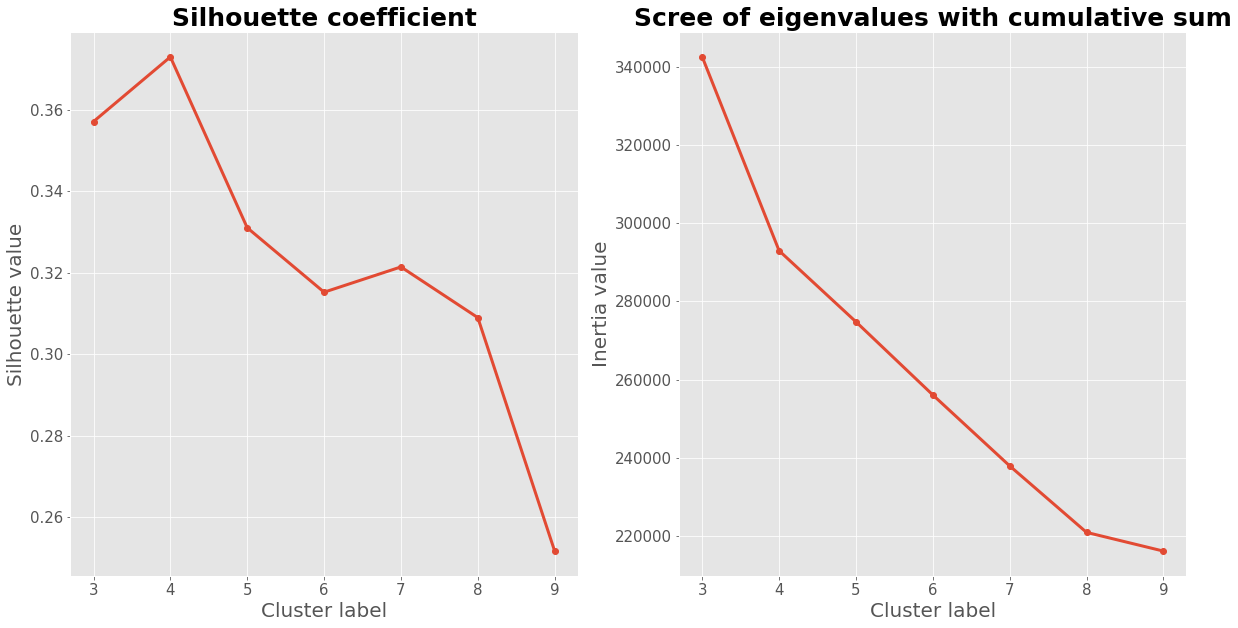

Time: 386.888 seconds


In [151]:
silhouette_inertia(data_cls3)

Il semble pertinent de partitionner les 60% de population (cluster 3) en 4. Voyons si cette segmentation supplémentaire peut apporter des infos complémentaires.

In [152]:
kmeans_model(data_cls3, k=4, folder='p5_00_model/').

Time: 1.079 seconds


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans Silhouette Score: 0.373
Time pca plot: 47.662 seconds


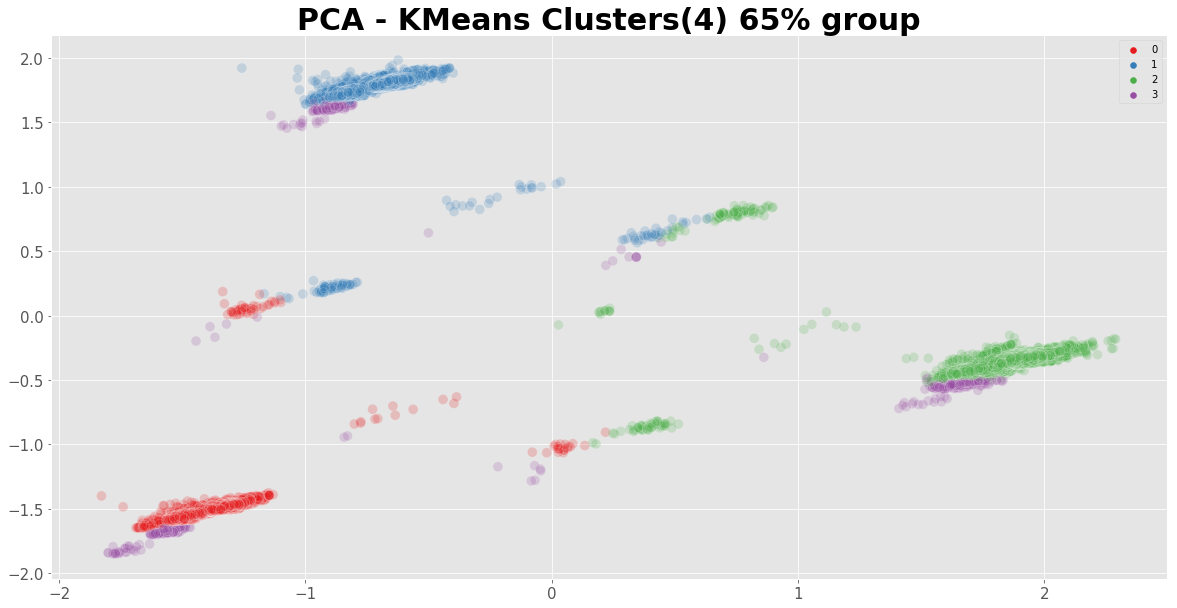

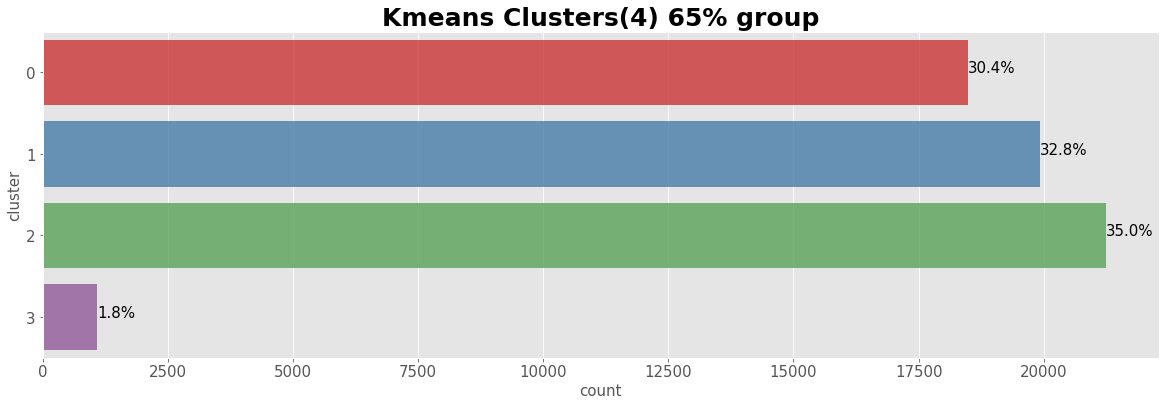

In [153]:
kmeans_clustering_pca(data_cls3, k=4, get_model='KMeans4_data_cls3', get_folder='p5_00_model/', 
                      add_title='65% group')

In [154]:
centroids_cls(data_cls3, get_model='KMeans4_data_cls3', get_folder='p5_00_model/')[1].T

0         1         2         3
average_basket               -0.525418 -0.368040 -0.129328 -0.358233
total_spent                  -0.550387 -0.400942 -0.183949 -0.381623
max_order_amount             -0.528993 -0.373267 -0.136920 -0.360536
min_order_amount             -0.518329 -0.360658 -0.121645 -0.353902
number_of_products_purchased -0.233821 -0.235727 -0.248088 -0.167420
bucket_quartile_lower25       1.822207 -0.553810 -0.555728  0.360009
bucket_quartile_25_50        -0.575733  1.762181 -0.573543  0.152890
bucket_quartile_50_75        -0.589151 -0.588493  1.721590  0.109999
bucket_quartile_upper75      -0.604438 -0.603914 -0.604526 -0.600918
payment_boleto                0.058983 -0.007708 -0.061694 -0.406729
payment_credit_card          -0.242105 -0.178131 -0.136472 -1.244773
payment_debit_card           -0.115755 -0.115755 -0.115755  6.871486
payment_voucher               0.010988  0.008802 -0.019910 -0.117075
appliances                   -0.095483 -0.067003 -0.051989 -0.054566
auto                         -0.090279 -0.074994 -0.044197 -0.066031
construction                 -0.079143 -0.069541 -0.042986 -0.056885
culture                      -0.025244 -0.017443  0.016570  0.006574
electronics                  -0.101986 -0.113024 -0.082621 -0.072448
fashion                      -0.153945 -0.121208 -0.082220 -0.136914
food                         -0.019818  0.011055 -0.020796  0.041345
garden                       -0.089850 -0.036589 -0.042371 -0.052243
health_beauty                -0.204655 -0.139586 -0.048537 -0.145311
hobbies                      -0.042272 -0.036715 -0.036093 -0.035883
home                         -0.247936 -0.137476 -0.030117 -0.156319
office                       -0.115128 -0.097621 -0.008436 -0.088523
others                       -0.123997 -0.103219 -0.026459 -0.114775
pets                         -0.070357 -0.046646  0.017696 -0.011115
sports_leisure               -0.152169 -0.099182 -0.013415 -0.094314
toys                         -0.110030 -0.061325 -0.005327 -0.076721
last_time_order              -0.159285 -0.151131 -0.174877 -0.403950
frequency_purchase           -0.233750 -0.235742 -0.248103 -0.167435
number_review_comment        -0.195988 -0.215800 -0.219914 -0.111540
state_MG                      0.108177  0.116120  0.125971  0.087397
state_PR                      0.052546  0.052011  0.051943  0.047838
state_RJ                      0.111857  0.128521  0.135908  0.114995
state_RS                      0.047513  0.061348  0.056369  0.049678
state_SP                      0.504952  0.421055  0.390770  0.523459
state_other                   0.174955  0.220945  0.239039  0.176633

**Cluster 3.0 :** faibles montants d'achats pour ce groupe de clients.

**Cluster 3.1 :** dépenses modérées, des acheteurs aux dépenses moyennes.

**Cluster 3.2 :** clients qui dépensent beaucoup plus que les deux précédents groupes.

**Cluster 3.3 :** une petite niche de clients qui payent uniquement en débit immédiat.

Ce nouveau clustering permet d'identifier des nuances de dépenses, mais aucune distinction sur des préférences d'achat. On peut réellement confirmer que ces acheteurs sont multi-produits, ils portent un intérêt pour des produits de toute sorte.

In [249]:
cluster_count = data_cls(olistbr, get_model='KMeans4_X', get_folder='p5_00_model/').groupby('cluster').max()
cluster_count['%spent'] = cluster_count['payment_boleto'].apply(lambda x: 100*x/cluster_count['total_spent'].sum())
cluster_count

average_basket  total_spent  max_order_amount  min_order_amount  \
cluster                                                                    
0               3999.90      4016.91           3999.90           3999.90   
1               6735.00     13664.08           6735.00           6735.00   
2               4099.99      6081.54           4099.99           4099.99   
3               6729.00      7274.88           6729.00           6729.00   

         number_of_products_purchased  bucket_quartile_lower25  \
cluster                                                          
0                                 7.0                      1.0   
1                                24.0                      1.0   
2                                12.0                      1.0   
3                                20.0                      1.0   

         bucket_quartile_25_50  bucket_quartile_50_75  \
cluster                                                 
0                          1.0                    1.0   
1                          1.0                    1.0   
2                          1.0                    1.0   
3                          1.0                    1.0   

         bucket_quartile_upper75  payment_boleto  payment_credit_card  \
cluster                                                                 
0                            1.0             6.0                  7.0   
1                            1.0            14.0                 24.0   
2                            1.0            12.0                 10.0   
3                            1.0            20.0                 20.0   

         payment_debit_card  payment_voucher  appliances     auto  \
cluster                                                             
0                       3.0              5.0     2338.08  2258.00   
1                       7.0             32.0     7388.00  1999.99   
2                       6.0             22.0     1999.00  2258.00   
3                       6.0             75.0     3999.00  2096.94   

         construction  culture  electronics  fashion     food  garden  \
cluster                                                                 
0              1554.0   217.99      3549.00   3999.9   173.99  2029.0   
1              2300.0   749.00     13440.00   1849.9   449.70  2200.0   
2              2160.0   524.90      4099.99   2179.0   215.56  1160.0   
3              3099.9  1420.00      7160.00   4400.0  2849.90  3930.0   

         health_beauty  hobbies     home   office   others    pets  \
cluster                                                              
0               2218.0  1997.00  2110.00   699.99   849.00   735.0   
1               3124.0  1999.00  2350.00  3089.00  1964.00   809.9   
2               2399.8  2109.90  2110.00  5934.60  2649.00  1069.0   
3               3899.0  4399.87  2199.99  2919.40  3109.99  2498.0   

         sports_leisure     toys  last_time_order  frequency_purchase  \
cluster                                                                 
0                1800.0   544.00           2300.0                 7.0   
1                3459.0  1499.99           8673.0                24.0   
2                3690.0  1449.00           3336.0                12.0   
3                4059.0  1699.99           8700.0                20.0   

         number_review_comment customer_state    %spent  
cluster                                                  
0                         42.0          other  0.019332  
1                         96.0          other  0.045107  
2                         55.0          other  0.038663  
3                         90.0          other  0.064438

In [239]:
data_cls3_ca1 = pd.DataFrame(data= [[0, 30.4, 7.84, 7.42, 6.50, 2.07, 8.38, 12.65, 1.62, 7.38, 16.82, 3.47, 20.38, 9.46, 5.78,12.50, 9.04], 
                    [1, 32.8, 5.91, 6.65, 6.16, 1.54, 10.02, 10.75, 0.97, 3.24, 12.38, 3.25, 12.15, 8.65, 4.13, 8.79, 5.44],
                    [2, 35, 4.91, 4.17, 4.06, 1.56, 7.80, 7.76, 1.96, 4.00, 4.58, 3.40, 2.84, 0.79, 1.67, 1.26, 0.50],
                    [3, 1.8, 0.27, 0.32, 0.27, 0.02, 0.35, 0.67, 0.19, 0.25, 0.71, 0.17, 0.77, 0.43, 0.05, 0.46, 0.14]], 
             columns=['Cluster', 'CA(%)', 'appliances', 'auto', 'construction', 'culture',
                      'electronics', 'fashion', 'food', 'garden', 'health_beauty', 'hobbies',
                      'home', 'office', 'pets', 'sports_leisure', 'toys']).set_index('Cluster').T
data_cls3_ca1.columns = ['3.0', '3.1', '3.2', '3.3']
data_cls3_ca1

3.0    3.1    3.2   3.3
CA(%)           30.40  32.80  35.00  1.80
appliances       7.84   5.91   4.91  0.27
auto             7.42   6.65   4.17  0.32
construction     6.50   6.16   4.06  0.27
culture          2.07   1.54   1.56  0.02
electronics      8.38  10.02   7.80  0.35
fashion         12.65  10.75   7.76  0.67
food             1.62   0.97   1.96  0.19
garden           7.38   3.24   4.00  0.25
health_beauty   16.82  12.38   4.58  0.71
hobbies          3.47   3.25   3.40  0.17
home            20.38  12.15   2.84  0.77
office           9.46   8.65   0.79  0.43
pets             5.78   4.13   1.67  0.05
sports_leisure  12.50   8.79   1.26  0.46
toys             9.04   5.44   0.50  0.14

In [195]:
data_cls3_ca2 = pd.DataFrame(data= [[0, 7.55, 30.99, 14.81, 1.40], [1, 1.09, 24.45, 15.98, 1.20],
                    [2, 9.07, 20.07, 17.02, 2.92],[3, 3.09, 9.47, 52.82, 0.89]], 
             columns=['Cluster', 'payment_boleto', 'payment_credit_card', 
                      'payment_debit_card', 'payment_voucher']).set_index('Cluster').T
data_cls3_ca2

Cluster                  0      1      2      3
payment_boleto        7.55   1.09   9.07   3.09
payment_credit_card  30.99  24.45  20.07   9.47
payment_debit_card   14.81  15.98  17.02  52.82
payment_voucher       1.40   1.20   2.92   0.89

Notons que la modélisation KMeans reste autant performante sur l'ensemble de la population que sur les 10000 de départ.\
**Testons la stabilité de l'algorithme dans le temps**, puisque la base client dépend directement du temps, elle ne cessera d'augmenter, il est donc nécessaire de démontrer sa stabilité pour les prochains mois, les prochaines années.

In [20]:
X_time = olistbr.copy()
X_time = X_time[X_time.last_time_order > 90]
X_time.shape

(77133, 33)

In [70]:
categorical_columns = X_time.select_dtypes('object').columns
numerical_columns = X_time.drop(columns=categorical_columns).columns

scaler = StandardScaler()
X_time[numerical_columns] = scaler.fit_transform(X_time[numerical_columns])

encoder = OneHotEncoder(sparse=False)
X_categorical = encoder.fit_transform(X_time[categorical_columns])
X_time = pd.merge(X_time[numerical_columns], pd.DataFrame(data = X_categorical, 
                                        columns = encoder.get_feature_names(['state'])).set_index(X_time.index),
                                        left_index = True, right_index = True)

X_time.name = "X_time"
X_time.shape

(77189, 38)

In [71]:
kmeans_model(X_time, k=4, folder='p5_00_model/')

Time: 2.311 seconds


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

KMeans Silhouette Score: 0.224
Time pca plot: 88.61 seconds


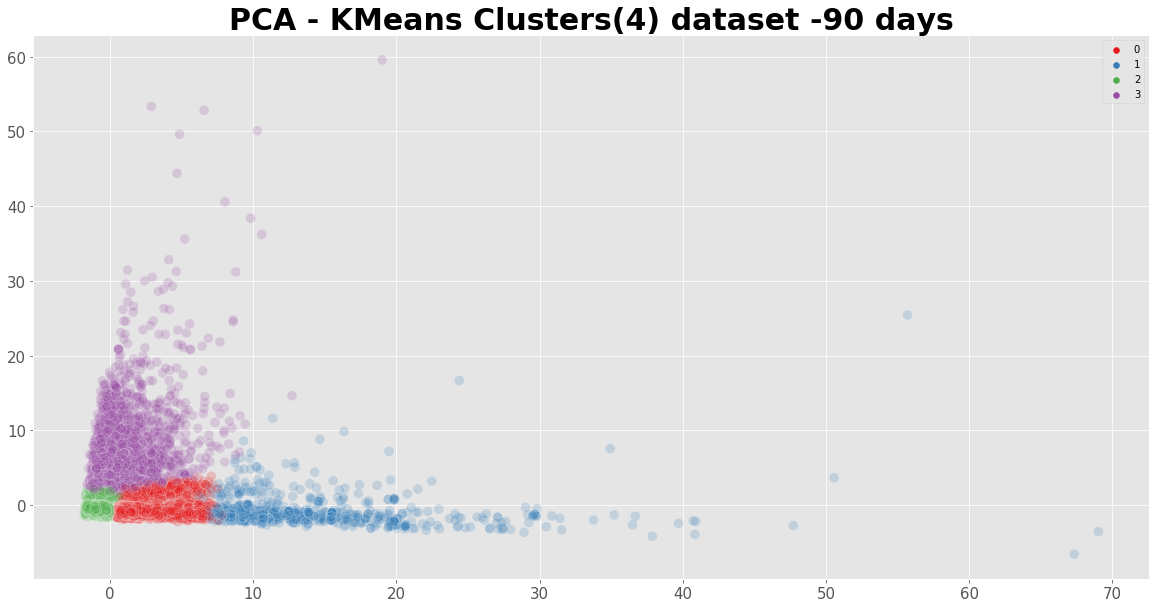

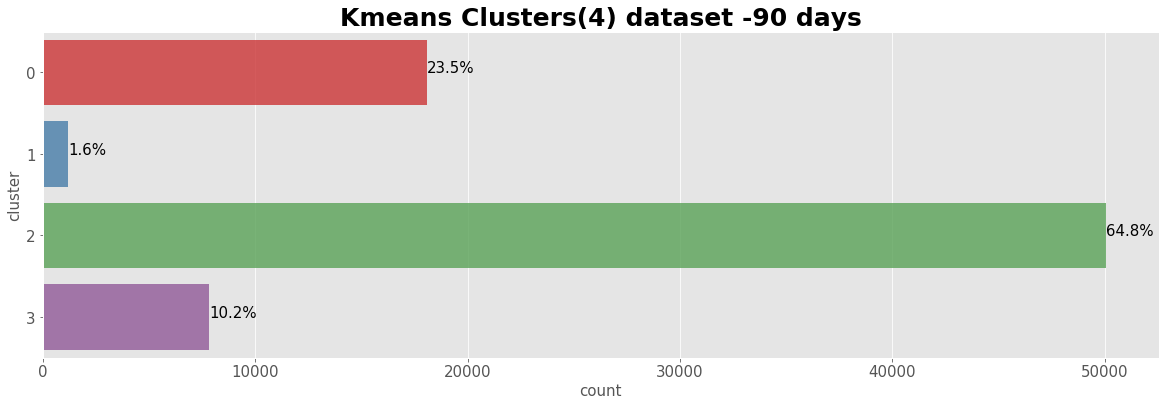

In [72]:
kmeans_clustering_pca(X_time, k=4, get_model='KMeans4_X_time', get_folder='p5_00_model/', 
                      add_title='dataset -90 days')

La stabilité du clustering en 4 groupes de clients aux profils similaires est satisfaisante dans le temps. Le Kmeans appliqué sur une population tronquée aux plus récentes (-90 jours) retourne des partitions similaires dont le coefficient de silhouette est équivalent.

In [73]:
centroids_cls(X_time, get_model='KMeans4_X_time', get_folder='p5_00_model/')[1]

average_basket  total_spent  max_order_amount  min_order_amount  \
0        0.652939     0.528473          0.640359          0.657633   
1        5.798074     5.248399          5.788508          5.755885   
2       -0.334849    -0.373095         -0.340954         -0.326553   
3       -0.267106     0.353909         -0.195724         -0.326099   

   number_of_products_purchased  bucket_quartile_lower25  \
0                     -0.237512                -0.560914   
1                     -0.143232                -0.557968   
2                     -0.246007                 0.179290   
3                      2.154215                 0.237326   

   bucket_quartile_25_50  bucket_quartile_50_75  bucket_quartile_upper75  \
0              -0.581107              -0.583148                 1.681384   
1              -0.575816              -0.587850                 1.678007   
2               0.206104               0.230370                -0.600625   
3               0.116180              -0.033255                -0.309011   

   payment_boleto  payment_credit_card  payment_debit_card  payment_voucher  \
0       -0.117555            -0.096868           -0.037375        -0.042139   
1       -0.116815             0.009950           -0.075820        -0.011750   
2       -0.017613            -0.210508            0.006650        -0.002300   
3        0.406645             1.573144            0.060458         0.116822   

   appliances      auto  construction   culture  electronics   fashion  \
0    0.060078  0.139063      0.088875  0.006426     0.092788  0.198973   
1    1.455958  0.929017      0.767479  0.253279     2.431981  2.193050   
2   -0.067209 -0.072118     -0.061402 -0.007240    -0.099187 -0.117330   
3    0.065551 -0.003713      0.068420 -0.006538     0.042018 -0.050555   

       food    garden  health_beauty   hobbies      home    office    others  \
0 -0.003728  0.035186       0.230864  0.020524  0.139751  0.122196  0.240722   
1 -0.041953  1.196274       1.883514  1.530282  0.460795  0.440290  0.551813   
2 -0.012068 -0.055228      -0.125174 -0.040105 -0.137478 -0.072019 -0.088634   
3  0.091791  0.086929      -0.022628 -0.028154  0.484793  0.115096 -0.073769   

       pets  sports_leisure      toys  last_time_order  frequency_purchase  \
0  0.044891        0.139948  0.163452        -0.189231           -0.237530   
1  0.210250        1.153202  0.195008        -0.107427           -0.143250   
2 -0.028535       -0.089881 -0.059833        -0.186312           -0.245995   
3  0.045392        0.072512 -0.023330         1.655026            2.154177   

   number_review_comment  state_MG  state_PR  state_RJ  state_RS  state_SP  \
0              -0.212767  0.119255  0.047559  0.141295  0.056396  0.356109   
1              -0.154723  0.115607  0.049546  0.145334  0.053675  0.310487   
2              -0.219299  0.117897  0.051864  0.128630  0.056760  0.427221   
3               1.928598  0.121061  0.050262  0.128971  0.055747  0.436408   

   state_other  
0     0.279386  
1     0.325351  
2     0.217628  
3     0.207552

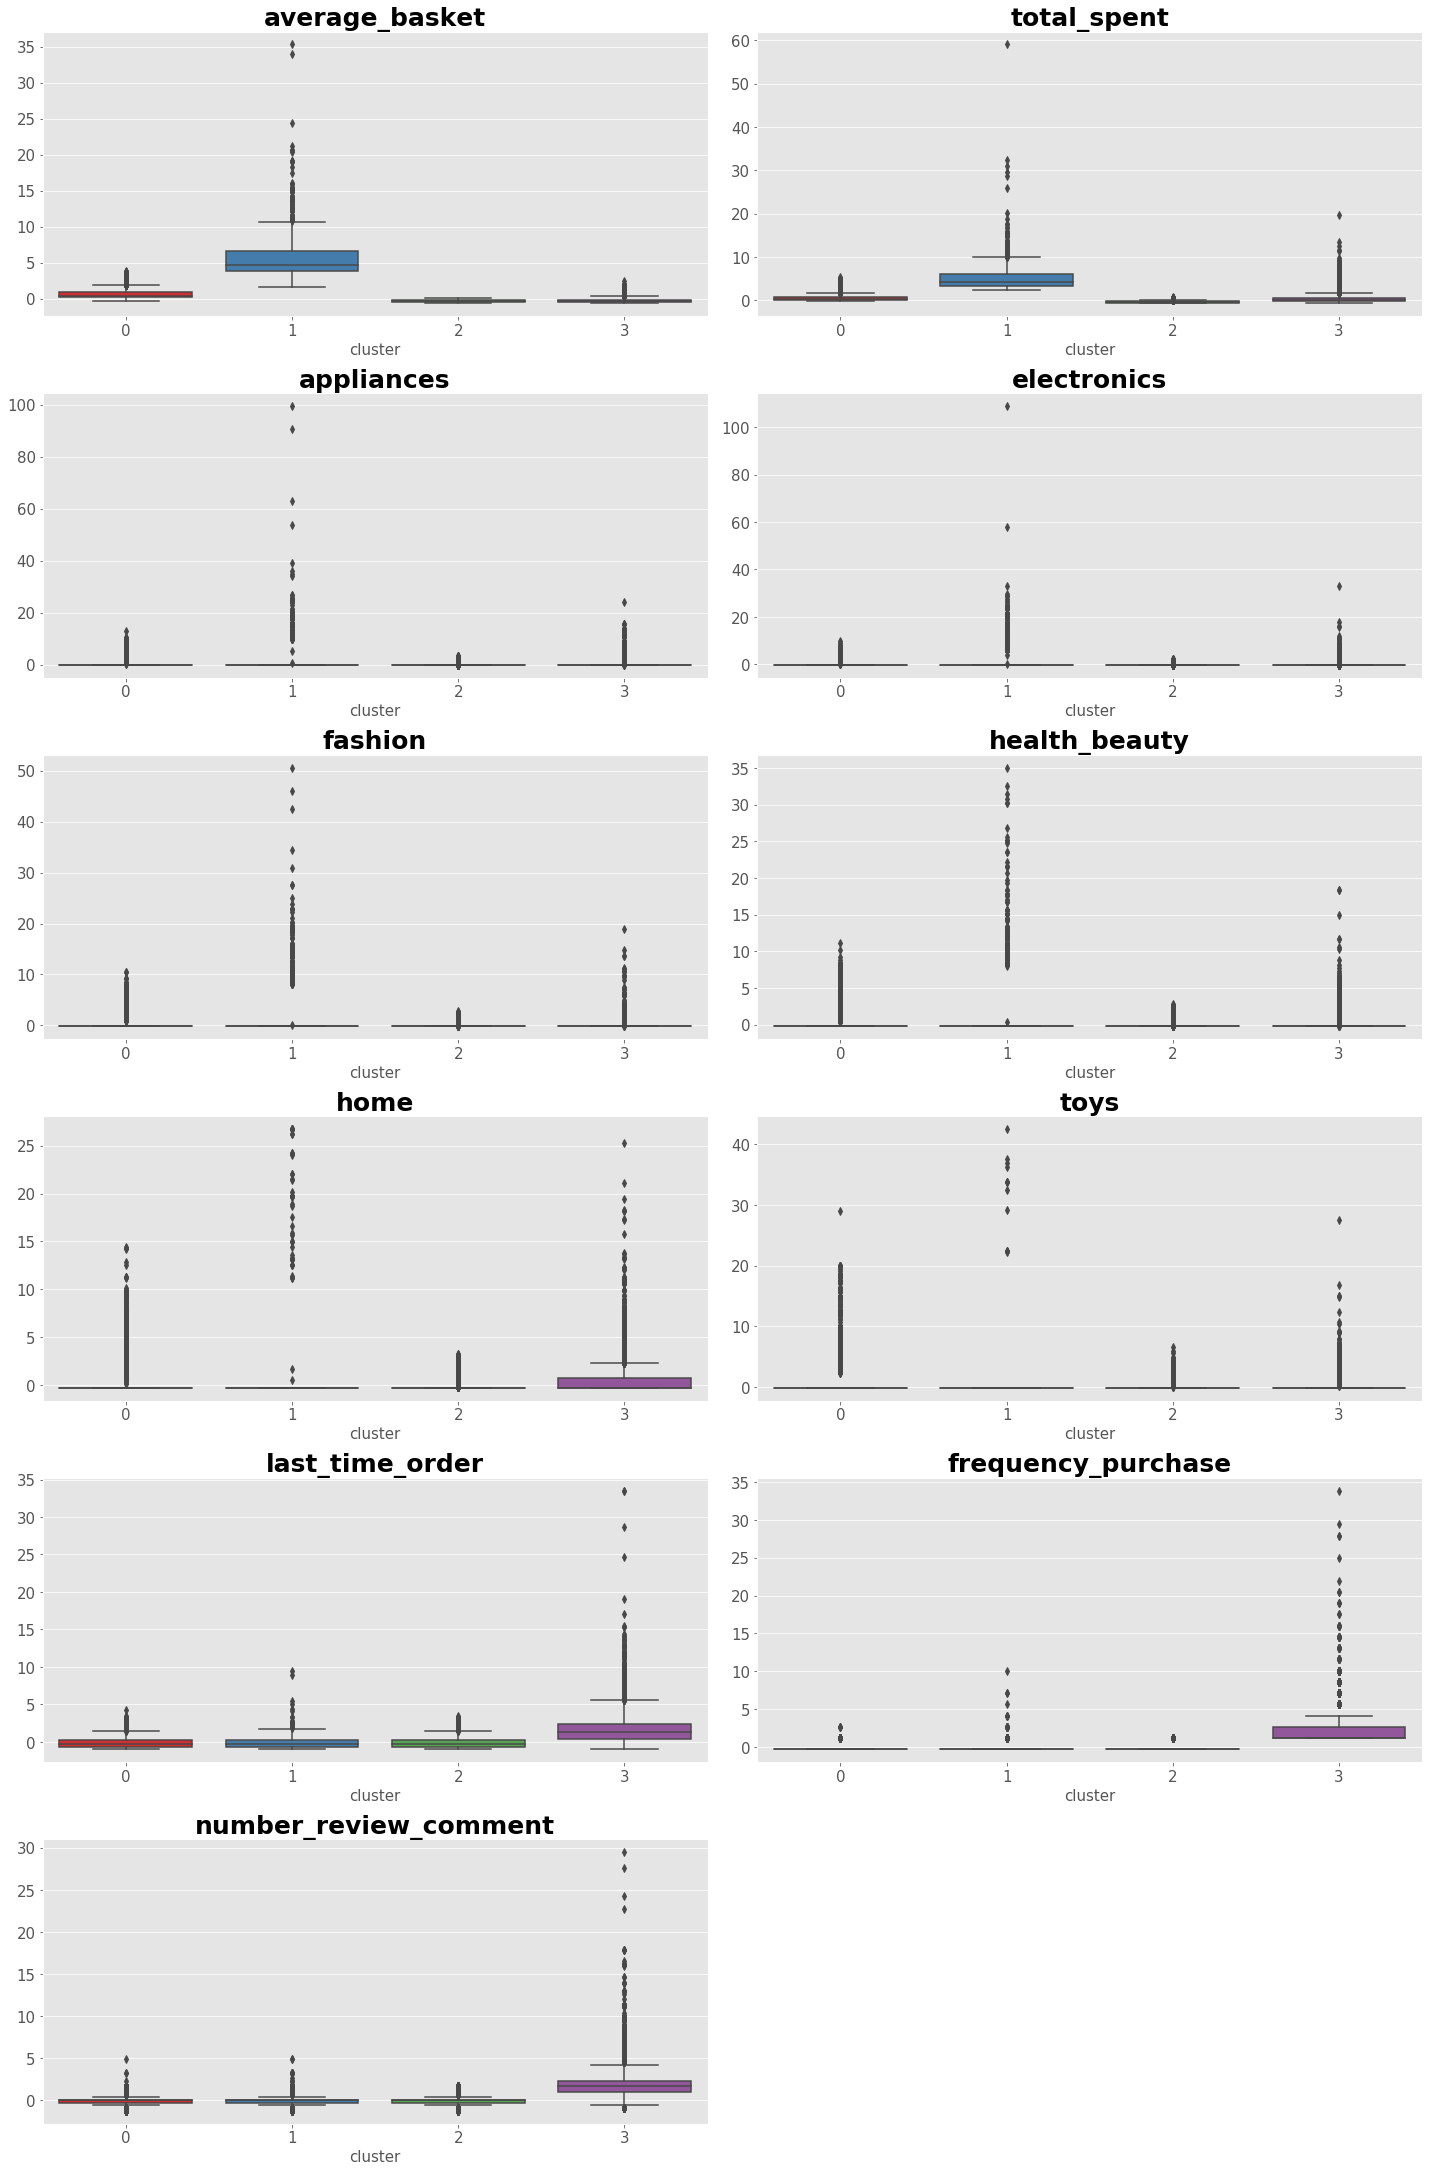

In [74]:
features_kmeans(X_time, ['average_basket', 'total_spent', 'number_orders', 'last_time_order', 
                           'frequency_purchase', 'number_review_comment', 'home', 'health_beauty', 
                           'fashion', 'electronics', 'appliances', 'toys'], 
                get_model='KMeans4_X_time', get_folder='p5_00_model/')

### Adjusted Rand Index (ARI score)
Vérification de l'ARI score qui permet de mesurer la similitude de nos clusters dans le temps.

In [101]:
pickle.load(open('p5_00_model/KMeans4_X.pkl', 'rb'))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [381]:
labels_true = pickle.load(open('p5_00_model/KMeans4_X.pkl', 'rb')).labels_
model_fit = pickle.load(open('p5_00_model/KMeans4_X.pkl', 'rb')).fit(X)
labels_pred = model_fit.predict(X)

metrics.adjusted_rand_score(labels_pred, labels_true)

0.8360247562419046

## Discussion sur les résultats et propositions d'amélioration

Le contexte métier permet en effet une modélisation par apprentissage non-supervisé, le clustering KMeans ressort comme étant le plus pertinent, le plus stable dans le temps quelque soit les essais effectués. L'ARI score vient également appuyer l'intuition de stabilité évoquée...  Le modèle KMeans retenu permet d'utiliser un .predict() pour établir un update entre deux fréquences de mise à jour (90 jours) pour prendre en compte les nouveaux clients.

Ceci étant, une combinaison complémentaire par segmentation RFM, permettrait de pouvoir comparer les similarités obtenues par Clustering. Rappelons que le clustering passe par de la réduction dimensionnelle qui, dans notre contexte, n'explique que 30% de la variance, à cela s'ajoute des profils de clients atypiques (Montant d'achat élevé) pouvant biaiser les groupes identifiés. Il peut donc être pertinent de procéder en plus par segmentation RFM pour classer les clients en se basant sur des similarités, en opposition au KMeans qui vise à trouver des similarités au sein des clients pour pouvoir les grouper.